## 1. Data loading

In [91]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from ydata_profiling import ProfileReport
from collections import Counter, OrderedDict

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

sns.set_theme('notebook')
sns.set_palette('Set2')

df_train = pd.read_csv('data/inputs/hotels_train.csv')
df_test = pd.read_csv('data/inputs/hotels_test.csv')

In [92]:
display(df_train.head())
display(df_train.info())

display(df_test.head())
display(df_test.info())

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   
3  216 Avenue Jean Jaures 19th arr 75019 Paris Fr...   
4          Molenwerf 1 1014 AG Amsterdam Netherlands   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   
3                            34   9/22/2015            7.5   
4                           914    3/5/2016            8.5   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel      United Kingdom    
1            Mercure London Bloomsbury Hotel      United Kingdom    
2          Legend Saint Germain by Elegancia               China    
3  Mercure Paris 19 Philharmonie La Villette      United Kingdom    
4                Golden Tulip Amsterdam West              Poland    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   
3          No Negative                                  0   
4         Torn sheets                                   4   

   total_number_of_reviews                                    positive_review  \
0                     1994                                 Staff were amazing   
1                     1361                                           location   
2                      406                                        No Positive   
3                      607   Friendly staff quiet comfortable room spotles...   
4                     7586   The staff was very friendly and helpful Break...   

   review_total_positive_word_counts  \
0                                  4   
1                                  2   
2                                  0   
3                                 11   
4                                 20   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   
2                                          14             7.5   
3                                           8            10.0   
4                                          10             9.6   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...           289 day   
3  [' Leisure trip ', ' Solo traveler ', ' Standa...           681 day   
4  [' Business trip ', ' Couple ', ' Standard Dou...           516 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097  
2  48.845377  2.325643  
3  48.888697  2.394540  
4  52.385601  4.847060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

hotel_address  \
0                 Via Senigallia 6 20161 Milan Italy   
1  Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...   
2        Mallorca 251 Eixample 08008 Barcelona Spain   
3  Piazza Della Repubblica 17 Central Station 201...   
4  Singel 303 309 Amsterdam City Center 1012 WJ A...   

   additional_number_of_scoring review_date  average_score  \
0                           904   7/21/2017            8.1   
1                           612  12/12/2016            8.6   
2                            46  11/26/2015            8.3   
3                           241  10/17/2015            9.1   
4                           834   5/16/2016            9.1   

                                   hotel_name        reviewer_nationality  \
0                              Hotel Da Vinci             United Kingdom    
1                           Urban Lodge Hotel                    Belgium    
2  Alexandra Barcelona A DoubleTree by Hilton                     Sweden    
3                    Hotel Principe Di Savoia   United States of America    
4                              Hotel Esther a             United Kingdom    

                                     negative_review  \
0   Would have appreciated a shop in the hotel th...   
1        No tissue paper box was present at the room   
2                                           Pillows    
3                                        No Negative   
4                                        No Negative   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                 52                    16670   
1                                 10                     5018   
2                                  3                      351   
3                                  0                     1543   
4                                  0                     4687   

                                     positive_review  \
0   Hotel was great clean friendly staff free bre...   
1                                        No Positive   
2                         Nice welcoming and service   
3   Everything including the nice upgrade The Hot...   
4                    Lovely hotel v welcoming staff    

   review_total_positive_word_counts  \
0                                 62   
1                                  0   
2                                  5   
3                                 27   
4                                  7   

   total_number_of_reviews_reviewer_has_given  \
0                                           1   
1                                           7   
2                                          15   
3                                           9   
4                                           2   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Double Room '...           13 days   
1  [' Leisure trip ', ' Group ', ' Triple Room ',...           234 day   
2  [' Business trip ', ' Solo traveler ', ' Twin ...           616 day   
3  [' Leisure trip ', ' Couple ', ' Ambassador Ju...           656 day   
4  [' Business trip ', ' Solo traveler ', ' Class...           444 day   

         lat       lng  
0  45.533137  9.171102  
1  52.385649  4.834443  
2  41.393192  2.161520  
3  45.479888  9.196298  
4  52.370545  4.888644

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

None

In [93]:
# dropping duplicates for train df
print("Train rows before dropping duplicates:", df_train.shape[0])
df_train.drop_duplicates(inplace=True)
print("Train rows after dropping duplicates:", df_train.shape[0])

Train rows before dropping duplicates: 386803
Train rows after dropping duplicates: 386496


In [94]:
# concat train and test dataframes by rows

# flags to differentiate between train and test records
df_train['sample'] = 1
df_test['sample'] = 0

# add reviewer score of -1 for test records to avoid NaNs
df_test['reviewer_score'] = -1

df = pd.concat([df_train, df_test]).reset_index(drop=True)
display(df.head(10))
display(df.tail(10))
display(df.info)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   
3  216 Avenue Jean Jaures 19th arr 75019 Paris Fr...   
4          Molenwerf 1 1014 AG Amsterdam Netherlands   
5                 Via Mecenate 121 20138 Milan Italy   
6  97 Cromwell Road Kensington and Chelsea London...   
7  Josefsgasse 4 6 08 Josefstadt 1080 Vienna Austria   
8  190 Queen s Gate Kensington and Chelsea London...   
9  Holland Park Avenue Kensington and Chelsea Lon...   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   
3                            34   9/22/2015            7.5   
4                           914    3/5/2016            8.5   
5                           105  12/30/2015            8.0   
6                           854   5/18/2017            7.8   
7                           227   1/23/2017            8.3   
8                           227  11/24/2015            8.6   
9                           843    2/2/2016            7.8   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel      United Kingdom    
1            Mercure London Bloomsbury Hotel      United Kingdom    
2          Legend Saint Germain by Elegancia               China    
3  Mercure Paris 19 Philharmonie La Villette      United Kingdom    
4                Golden Tulip Amsterdam West              Poland    
5            Novotel Milano Linate Aeroporto              France    
6        Holiday Inn London Kensington Forum      United Kingdom    
7                     Mercure Josefshof Wien      United Kingdom    
8       The Gore Hotel Starhotels Collezione      United Kingdom    
9             Hilton London Kensington Hotel      United Kingdom    

                                     negative_review  \
0                                           Leaving    
1                                     poor breakfast   
2                                 No kettle in room    
3                                        No Negative   
4                                       Torn sheets    
5                                            Nothing   
6                             Nothing it was lovely    
7   The communal areas are a bit soul less and th...   
8   undergoing refurbishment no tea coffer in roo...   
9   I advised it was for my husbands birthday and...   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                  3                     1994   
1                                  3                     1361   
2                                  6                      406   
3                                  0                      607   
4                                  4                     7586   
5                                  2                     1607   
6                                  6                     3867   
7                                 40                     2526   
8                                 30                      968   
9                                 47                     3801   

                                     positive_review  \
0                                 Staff were amazing   
1                                           location   
2                                        No Positive   
3   Friendly staff quiet comfortable room spotles...   
4   The staff was very friendly and helpful Break...   
5   Very nice hotel Price is excellent when compa...   
6   Very central location 2 minutes walk from Glo...   
7   The location is good for transport links espe...   
8                staff very good location wonderful    
9                                        No Positive   

   review_total_positive_word

hotel_address  \
515421           25 Rue Vernet 8th arr 75008 Paris France   
515422  Rotensterngasse 7a 02 Leopoldstadt 1020 Vienna...   
515423  John M Keynesplein 2 Slotervaart 1066 EP Amste...   
515424  40 Rue du Commandant Ren Mouchotte 14th arr 75...   
515425  22 Portman Square Westminster Borough London W...   
515426  Viale Monza 132 Distretto Viale Monza 20127 Mi...   
515427  Duc De Medinaceli 8 Ciutat Vella 08002 Barcelo...   
515428  Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...   
515429  Corso Concordia 1 Milan City Center 20129 Mila...   
515430       202 rue de Rivoli 1st arr 75001 Paris France   

        additional_number_of_scoring review_date  average_score  \
515421                            75   3/13/2017            8.6   
515422                            75   8/13/2015            8.1   
515423                           350   7/31/2016            7.9   
515424                           228   3/10/2016            7.9   
515425                           597    3/6/2016            7.9   
515426                            53    2/3/2016            8.1   
515427                            46   6/18/2016            7.8   
515428                           260    7/6/2017            8.0   
515429                           159  12/26/2015            9.0   
515430                           297  12/23/2015            8.0   

                                 hotel_name        reviewer_nationality  \
515421                         H tel Vernet                  Australia    
515422                   Hotel Nestroy Wien       United Arab Emirates    
515423           Dutch Design Hotel Artemis             United Kingdom    
515424          H tel Concorde Montparnasse                     France    
515425    Radisson Blu Portman Hotel London                     Turkey    
515426  Best Western Antares Hotel Concorde                     Greece    
515427                           Medinaceli   United States of America    
515428           Suite Hotel 900 m zur Oper                New Zealand    
515429      Ch teau Monfort Relais Ch teaux                  Australia    
515430   Saint James Albany Paris Hotel Spa             United Kingdom    

                                          negative_review  \
515421                                     Bed a bit hard   
515422                                        No Negative   
515423         Route to tram very vague needs more detail   
515424   19 for breakfast when there a numerous cafes ...   
515425   This price should include breakfast additiona...   
515426                                        No Negative   
515427                                        No Negative   
515428   No coffee in complimentary coffee in the room...   
515429                                        No Negative   
515430              rooms were very dated and old fashion   

        review_total_negative_word_counts  total_number_of_reviews  \
515421                                  5                      473   
515422                                  0                      682   
515423                                  9                     2167   
515424                                 21                     2515   
515425                                 17                     2308   
515426                                  0                      984   
515427                                  0                      523   
515428                                 31                     3461   
515429                                  0                     1053   
515430                                  8                     2868   

                                          positive_review  \
515421   Hotel is beautiful and staff were helpful fri...   
515422   AC was a plus especially during this hot week...   
515423   Kind helpful staff nice clean hotel value for...   
515424   Perfect for the early morning train from Mont...   
515425   The room was very clean and good including eq...   

<bound method DataFrame.info of                                             hotel_address  \
0       Stratton Street Mayfair Westminster Borough Lo...   
1       130 134 Southampton Row Camden London WC1B 5AF...   
2        151 bis Rue de Rennes 6th arr 75006 Paris France   
3       216 Avenue Jean Jaures 19th arr 75019 Paris Fr...   
4               Molenwerf 1 1014 AG Amsterdam Netherlands   
...                                                   ...   
515426  Viale Monza 132 Distretto Viale Monza 20127 Mi...   
515427  Duc De Medinaceli 8 Ciutat Vella 08002 Barcelo...   
515428  Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...   
515429  Corso Concordia 1 Milan City Center 20129 Mila...   
515430       202 rue de Rivoli 1st arr 75001 Paris France   

        additional_number_of_scoring review_date  average_score  \
0                                581   2/19/2016            8.4   
1                                299   1/12/2017            8.3   
2                                 

## 2. Data cleaning

In [95]:
# review_date to date
df['review_date'] = pd.to_datetime(df['review_date'])

# extracts number of days since review
def get_days_num(days_str: str):
    return days_str.split(" ")[0]

df.loc[:, 'days_since_review'] = df['days_since_review'].apply(get_days_num)
df['days_since_review'] = df['days_since_review'].astype('int')


### Duplicates

Duplicates were dealt with before concatenating train and test dataframes.

### Missing values

We have 2,448 missing values in ```lat``` and ```lng```. Filling them as follows:

1. Trying to find other hotels in the same address (building number + street + district) => take mean ```lat``` and ```lng``` from those;
2. If no matches above, then taking means from the hotels from the same postcode;
3. If no matches above, then moving to the city level;
4. If no matches above, then moving to the country level;
4. If no matches above, set 0 for the attributes

But first, let's separate address, postcode and city and country into their own attributes

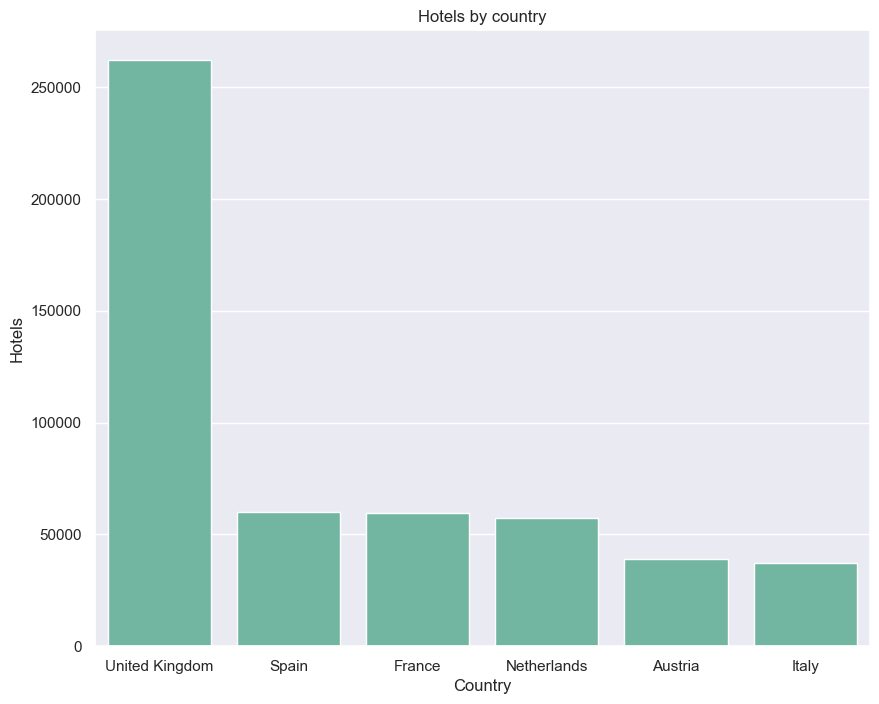

In [96]:
# takes hotel address and returns its country
def find_country(hotel_address: str) -> str:
    country = hotel_address.split(" ")[-1]
    if country == 'Kingdom':
        return 'United Kingdom'
    return country

# adding country attribute
df['country'] = df['hotel_address'].apply(find_country)

# building a hist of hotels by country
grouped_by_country = df.groupby('country')['country'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=grouped_by_country)
plt.title('Hotels by country')
plt.xlabel('Country')
plt.ylabel('Hotels')
plt.show();

With 6 countries represented, we need to make sure that we can extract country, city etc. from the address in the correct way for each country.

Because the address format in the UK differs from the one in Spain etc.

So, for each record, let's extract:
- city
- postcode
- address (building number + street + district, too tricky to split these 3 for now)

In [97]:
# takes hotel address and returns address, city and postcode
def extract_addr_info(hotel_address: str, country: str) -> tuple:
    addr_list = hotel_address.split(" ")[::-1]
    
    if country == 'United Kingdom':
        postcode = " ".join(addr_list[2:4])
        city = addr_list[4]
        address = " ".join(addr_list[5:])
    elif country == 'Netherlands':
        city = addr_list[1]
        postcode = addr_list[3]
        address = " ".join(addr_list[4:])
    # other countries have the same hotel address format, hence using ELSE
    else:
        city = addr_list[1]
        postcode = addr_list[2]
        address = " ".join(addr_list[3:])
    
    return address, city, postcode

# adding new cols
df[['address', 'city', 'postcode']] = df.apply(
    lambda row: extract_addr_info(row['hotel_address'], row['country']),
    axis=1
    ).apply(pd.Series)

# dropping hotel address as it's all split into separate cols
df.drop(['hotel_address'], axis=1, inplace=True)

Now, we can find ```lat``` and ```lng``` mathches or their means for the hotels where these attributes are NaN:

In [98]:
# precompute mean lat and lng for postcode, city and country and store in dicts
postcode_dict = df.groupby('postcode')[['lat', 'lng']].mean().to_dict(orient='index')
city_dict = df.groupby('city')[['lat', 'lng']].mean().to_dict(orient='index')
country_dict = df.groupby('country')[['lat', 'lng']].mean().to_dict(orient='index')


# takes a df row and attribute name -> checks whether value is NaN -> if yes, then fills it either via
# complete match or mean; if no, then returns the current value
def calculate_attr(row, attr:str) -> float:
    if pd.isna(row[attr]):
        address, postcode, city, country = row['address'], row['postcode'], row['city'], row['country']
        
        # checking levels: address -> postcode -> city -> country
        
        # if there's an address match with non-NaN attr, return the filled attr from that match
        same_address_df = df[(df['address']==address) & (df[attr].notnull())][attr]
        if same_address_df.shape[0] > 0:
            return same_address_df.iloc[0]
        
        # if no exact match above, return a mean
        postcode = df[df['address']==address]['postcode'].iloc[0]
        if postcode in postcode_dict and pd.notna(postcode_dict[postcode][attr]):
            return postcode_dict[postcode][attr]
        
        city = df[df['address']==address]['city'].iloc[0]
        if city in city_dict and pd.notna(city_dict[city][attr]):
            return city_dict[city][attr]
        
        country = df[df['address']==address]['country'].iloc[0]
        if country in country_dict and pd.notna(country_dict[country][attr]):
            return country_dict[country][attr]
        
        return float(-1)
    else:
        return row[attr]
    
df['lat'] = df.apply(lambda row: calculate_attr(row, 'lat'), axis=1)
df['lng'] = df.apply(lambda row: calculate_attr(row, 'lng'), axis=1)

display(df.head())
display(df.info())

additional_number_of_scoring review_date  average_score  \
0                           581  2016-02-19            8.4   
1                           299  2017-01-12            8.3   
2                            32  2016-10-18            8.9   
3                            34  2015-09-22            7.5   
4                           914  2016-03-05            8.5   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel      United Kingdom    
1            Mercure London Bloomsbury Hotel      United Kingdom    
2          Legend Saint Germain by Elegancia               China    
3  Mercure Paris 19 Philharmonie La Villette      United Kingdom    
4                Golden Tulip Amsterdam West              Poland    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   
3          No Negative                                  0   
4         Torn sheets                                   4   

   total_number_of_reviews                                    positive_review  \
0                     1994                                 Staff were amazing   
1                     1361                                           location   
2                      406                                        No Positive   
3                      607   Friendly staff quiet comfortable room spotles...   
4                     7586   The staff was very friendly and helpful Break...   

   review_total_positive_word_counts  ...  reviewer_score  \
0                                  4  ...            10.0   
1                                  2  ...             6.3   
2                                  0  ...             7.5   
3                                 11  ...            10.0   
4                                 20  ...             9.6   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...               531   
1  [' Business trip ', ' Couple ', ' Standard Dou...               203   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...               289   
3  [' Leisure trip ', ' Solo traveler ', ' Standa...               681   
4  [' Business trip ', ' Couple ', ' Standard Dou...               516   

         lat       lng  sample         country  \
0  51.507894 -0.143671       1  United Kingdom   
1  51.521009 -0.123097       1  United Kingdom   
2  48.845377  2.325643       1          France   
3  48.888697  2.394540       1          France   
4  52.385601  4.847060       1     Netherlands   

                                       address       city  postcode  
0  Borough Westminster Mayfair Street Stratton     London   8LT W1J  
1               Camden Row Southampton 134 130     London  5AF WC1B  
2                arr 6th Rennes de Rue bis 151      Paris     75006  
3              arr 19th Jaures Jean Avenue 216      Paris     75019  
4                                  1 Molenwerf  Amsterdam      1014  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                515431 non-null  int64         
 1   review_date                                 515431 non-null  datetime64[ns]
 2   average_score                               515431 non-null  float64       
 3   hotel_name                                  515431 non-null  object        
 4   reviewer_nationality                        515431 non-null  object        
 5   negative_review                             515431 non-null  object        
 6   review_total_negative_word_counts           515431 non-null  int64         
 7   total_number_of_reviews                     515431 non-null  int64         
 8   positive_review                             515431 non-null  object       

None

As can be seen, the NaNs were filled according to the above logic.

### Outliers

In [99]:
df['hotel_name'] = df['hotel_name'].astype('category')
df['postcode'] = df['postcode'].astype('category')
ProfileReport(df, title='Hotel reviews data profiling report');

```additional_number_of_scoring``` and ```total_number_of_reviews``` remind a log-normal distribution. Let's bring these attributes closer to the normal distribution via z-score:

In [100]:
# takes an attr and returns its log version as well as lower and upper bounds according to the 3-sigma rule
def z_score_bounds(attr: pd.Series):
    x = np.log(attr+1)
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    
    return x, lower_bound, upper_bound

# we only want to remove outliers from the train dataset records
train_df = df[df['sample']==1]
test_df = df[df['sample']==0]

print('Records before:', train_df.shape[0])

logged_attr, lower_bound, upper_bound = z_score_bounds(train_df['additional_number_of_scoring'])
train_df = train_df[(logged_attr>=lower_bound) & (logged_attr<=upper_bound)]

logged_attr, lower_bound, upper_bound = z_score_bounds(train_df['total_number_of_reviews'])
train_df = train_df[(logged_attr>=lower_bound) & (logged_attr<=upper_bound)]

print('Records after:', train_df.shape[0])

df = pd.concat([train_df, test_df]).reset_index(drop=True)

Records before: 386496
Records after: 384447


All outliers beyond the 3 sigmas interval for log values of the attributes were dropped.

## 3. EDA

### Data visualization & feature engineering

In [101]:
# function for displaying hists and box plots for continuous numeric attributes
def draw_hist_box(df: pd.DataFrame, attr: str, bins: int):
    attr_name = " ".join(attr.split('_'))
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    sns.histplot(df[attr], kde=True, ax=axes[0], bins=bins)
    axes[0].set(xlabel=f'{attr_name}', ylabel='frequency')
    axes[0].set_title(f'Histogram of {attr_name} distribution')
    axes[0].axvline(df[attr].mean(), color='red', linestyle='--', linewidth=0.8)
    
    sns.boxplot(df[attr], ax=axes[1], orient='h', medianprops={'color': 'red', 'linestyle': '--'})
    axes[1].set(xlabel=f'{attr_name}')
    axes[1].set_title(f'Boxplot of {attr_name} distribution')
    
    plt.show()

#### Review score

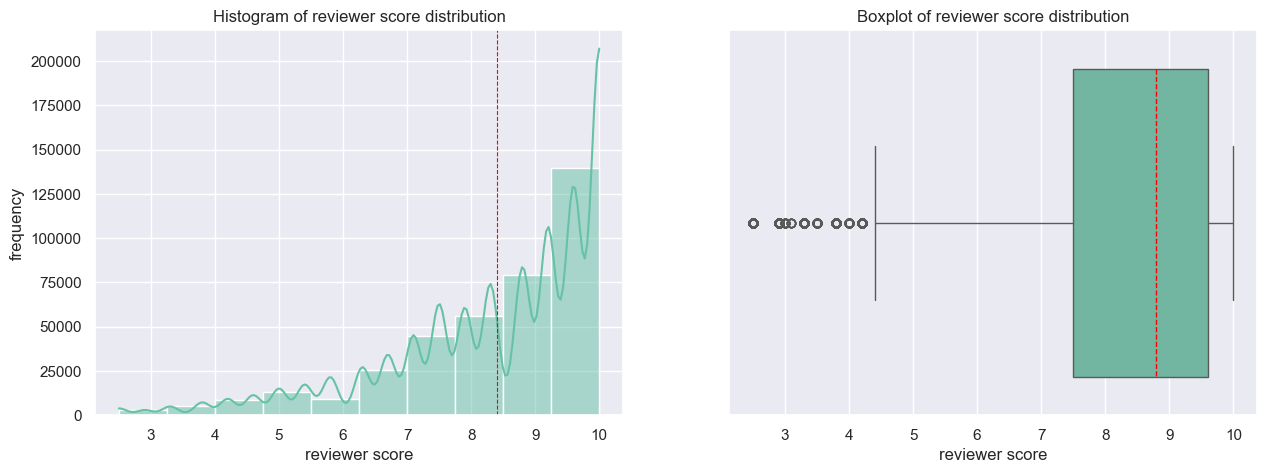

Working with the test dataset which doesn't include the reviewer score target column.


In [102]:
draw_hist_box(df=df[df['sample']==1], attr='reviewer_score', bins=10)
print("Working with the test dataset which doesn't include the reviewer score target column.")

50% of the scores lie between ~7.5 and ~9.6 while the moda for the reveiwer scores is somewhere between ~9.2 and 10.

This, plus the scewness of the IQR towards the right, gives us the hint that, on average, reviewers were pleased with their hotel experience.

We have some outliers on the lower scores side though, might explore them in more details further.

#### Average score

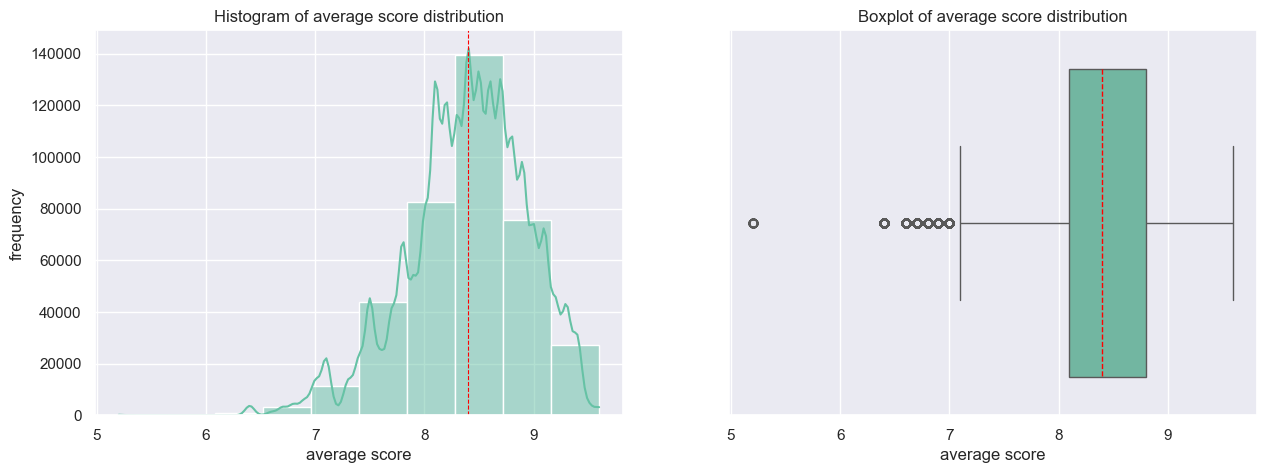

In [103]:
draw_hist_box(df=df[df['sample']==1], attr='average_score', bins=10)

The average score distribution is close to normal. The difference between the distribution of the reviewer score and average score might be due to the outliers scoring their hotel experience lower.

One clue here is that scores without reviews might distort the picture, so we need to look into the scores for those with and without reviews separately.

Records without reviews have positive/negative review fields filled as "No Positive" and "No Negative" respectively.

#### Reviewer and average scores for records with and without reviews

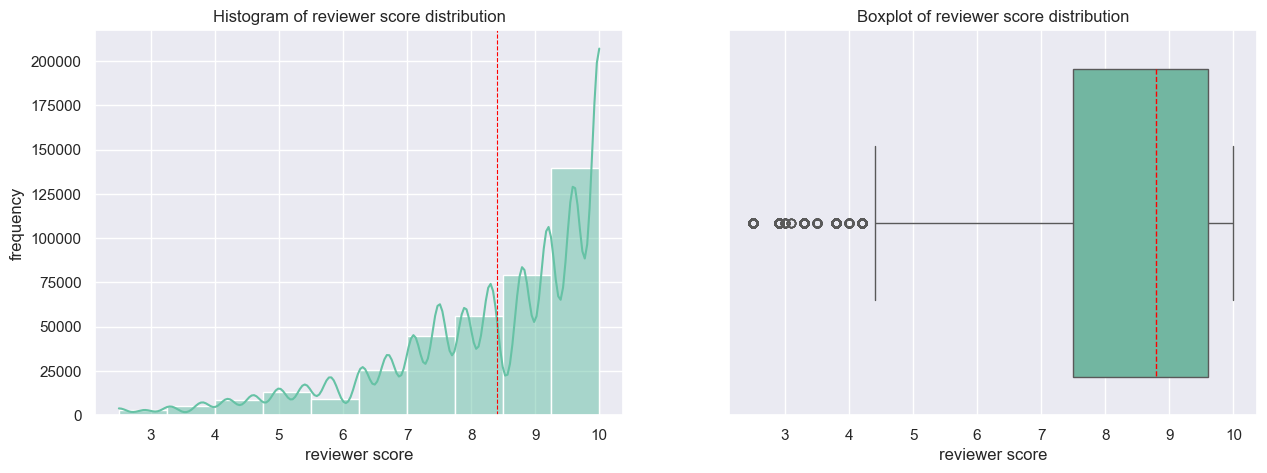

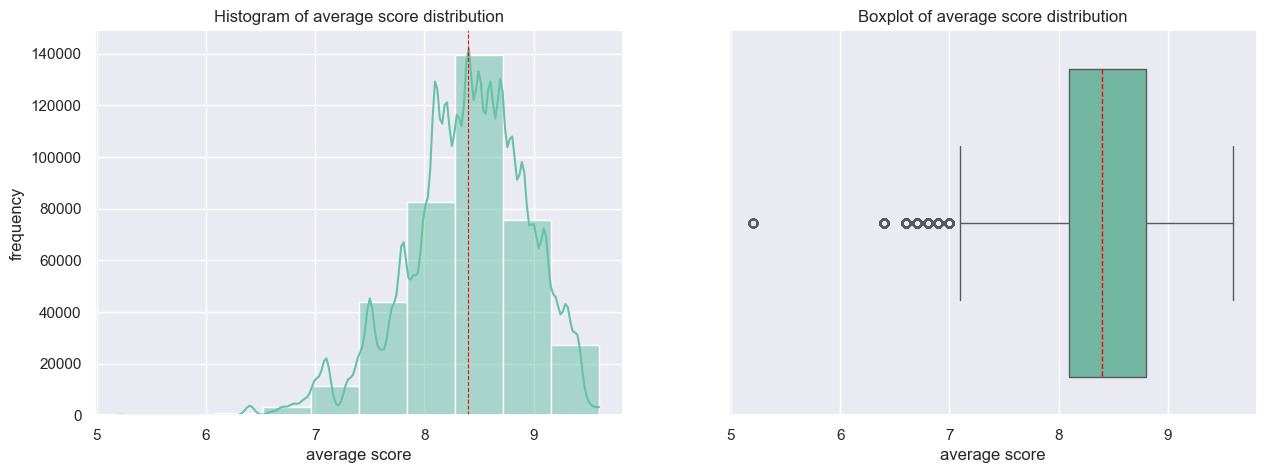

In [104]:
df_with_reviews = df[((df['positive_review']!='No Positive') | (df['negative_review']!='No Negative')) & (df['sample']==1)]
df_without_reviews = df[(df['positive_review']=='No Positive') & (df['negative_review']=='No Negative') & (df['sample']==1)]

# hist and box for reviever and average scores for df with reviews
draw_hist_box(df=df_with_reviews, attr='reviewer_score', bins=10)
draw_hist_box(df=df_with_reviews, attr='average_score', bins=10)

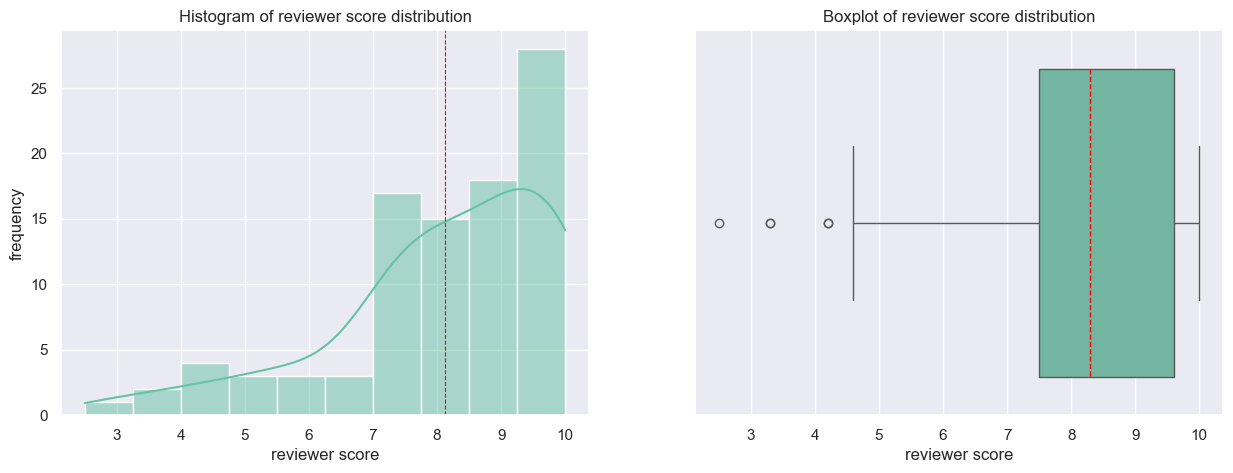

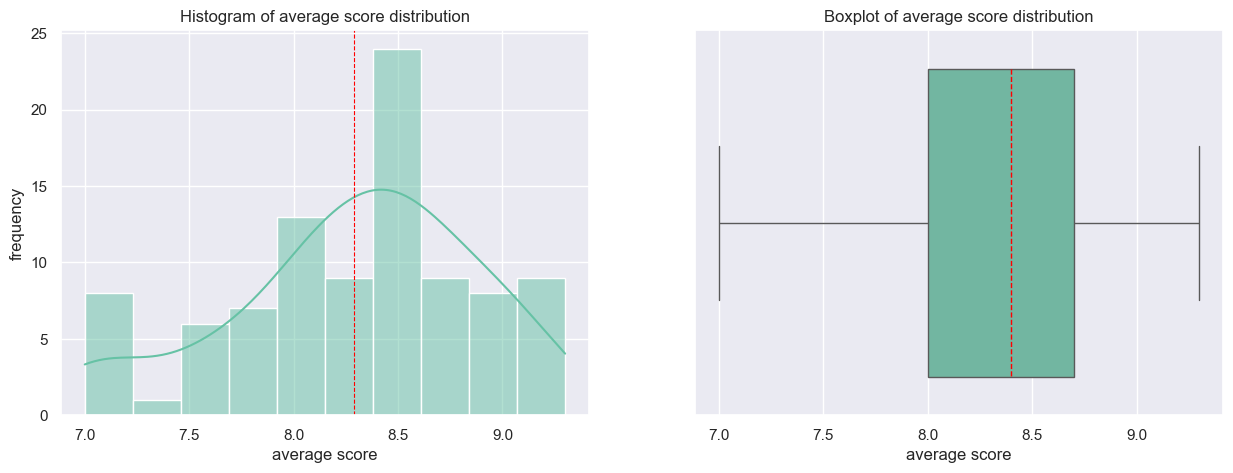

In [105]:
# hist and box for reviever and average scores for df without reviews
draw_hist_box(df=df_without_reviews, attr='reviewer_score', bins=10) 
draw_hist_box(df=df_without_reviews, attr='average_score', bins=10)

Those people who rated hotels without a review, tended to give the hotel a bit less score compared to those who wrote a review.

Also, the majority of outliers are on the side of reviewers with review, so it might've really been a poor experience for them which they shared in their reviews.

Anyway, for now, let's introduce 2 boolean attributes of whether positive and negative reviews were provided for each record:

In [106]:
df['is_positive'] = df['positive_review'].apply(lambda x: 0 if x=='No Positive' else 1)
df['is_negative'] = df['negative_review'].apply(lambda x: 0 if x=='No Negative' else 1)

df.head()

additional_number_of_scoring review_date  average_score  \
0                           581  2016-02-19            8.4   
1                           299  2017-01-12            8.3   
2                            32  2016-10-18            8.9   
3                            34  2015-09-22            7.5   
4                           914  2016-03-05            8.5   

                                  hotel_name reviewer_nationality  \
0                         The May Fair Hotel      United Kingdom    
1            Mercure London Bloomsbury Hotel      United Kingdom    
2          Legend Saint Germain by Elegancia               China    
3  Mercure Paris 19 Philharmonie La Villette      United Kingdom    
4                Golden Tulip Amsterdam West              Poland    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   
3          No Negative                                  0   
4         Torn sheets                                   4   

   total_number_of_reviews                                    positive_review  \
0                     1994                                 Staff were amazing   
1                     1361                                           location   
2                      406                                        No Positive   
3                      607   Friendly staff quiet comfortable room spotles...   
4                     7586   The staff was very friendly and helpful Break...   

   review_total_positive_word_counts  ...  days_since_review        lat  \
0                                  4  ...                531  51.507894   
1                                  2  ...                203  51.521009   
2                                  0  ...                289  48.845377   
3                                 11  ...                681  48.888697   
4                                 20  ...                516  52.385601   

        lng  sample         country  \
0 -0.143671       1  United Kingdom   
1 -0.123097       1  United Kingdom   
2  2.325643       1          France   
3  2.394540       1          France   
4  4.847060       1     Netherlands   

                                       address       city  postcode  \
0  Borough Westminster Mayfair Street Stratton     London   8LT W1J   
1               Camden Row Southampton 134 130     London  5AF WC1B   
2                arr 6th Rennes de Rue bis 151      Paris     75006   
3              arr 19th Jaures Jean Avenue 216      Paris     75019   
4                                  1 Molenwerf  Amsterdam      1014   

  is_positive is_negative  
0           1           1  
1           1           1  
2           0           1  
3           1           0  
4           1           1  

[5 rows x 23 columns]

#### Total number of reviews & Additional number of scoring

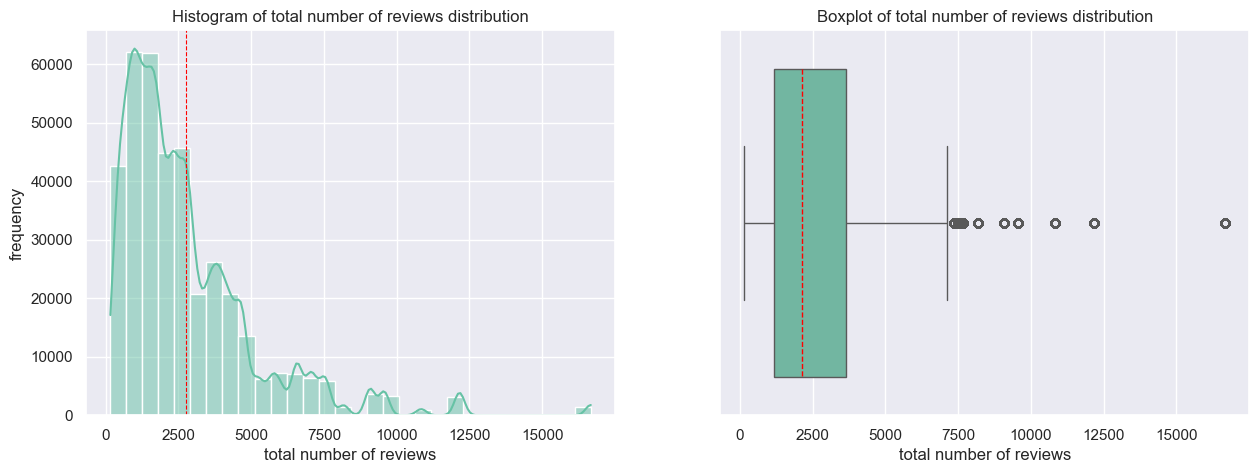

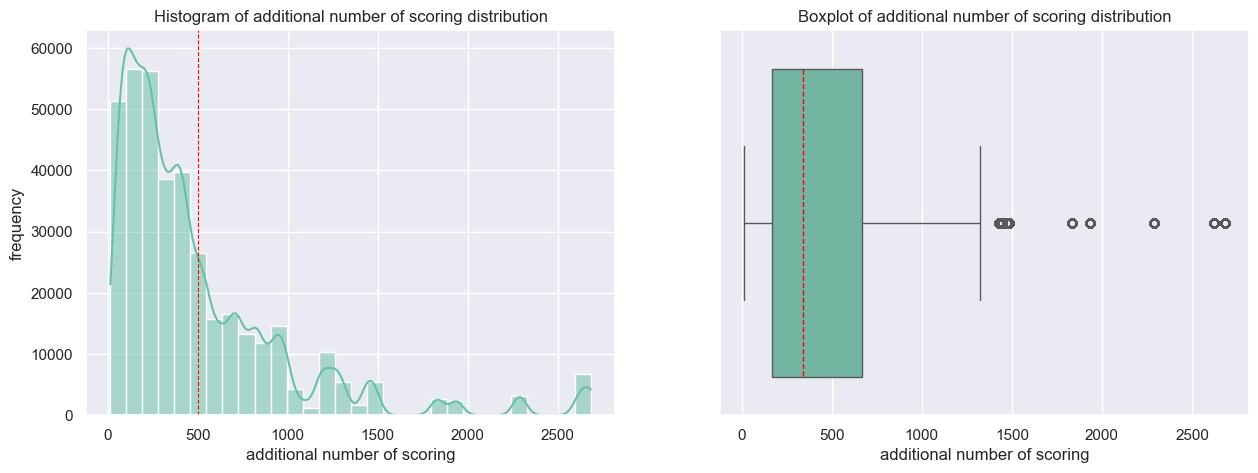

In [107]:
draw_hist_box(df=df[df['sample']==1], attr='total_number_of_reviews', bins=30)
draw_hist_box(df=df[df['sample']==1], attr='additional_number_of_scoring', bins=30)

Very similar distribution, will see how these attributes correlate between one another later.

For now, let's create an attribute which sums scores with reviews and scores without reviews:

In [108]:
df['total_scores'] = df['additional_number_of_scoring'] + df['total_number_of_reviews']

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513382 entries, 0 to 513381
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                513382 non-null  int64         
 1   review_date                                 513382 non-null  datetime64[ns]
 2   average_score                               513382 non-null  float64       
 3   hotel_name                                  513382 non-null  category      
 4   reviewer_nationality                        513382 non-null  object        
 5   negative_review                             513382 non-null  object        
 6   review_total_negative_word_counts           513382 non-null  int64         
 7   total_number_of_reviews                     513382 non-null  int64         
 8   positive_review                             513382 non-null  object       

#### Word counts for positive and negative reviews

Now, the assumption is that people will write more words in the positive side of the review if they liked their stay more than disliked, and vice versa.

Let's calculate delta for these 2 attributes and visualized it:

In [110]:
df['positive_negative_word_delta'] = df['review_total_positive_word_counts'] - df['review_total_negative_word_counts']

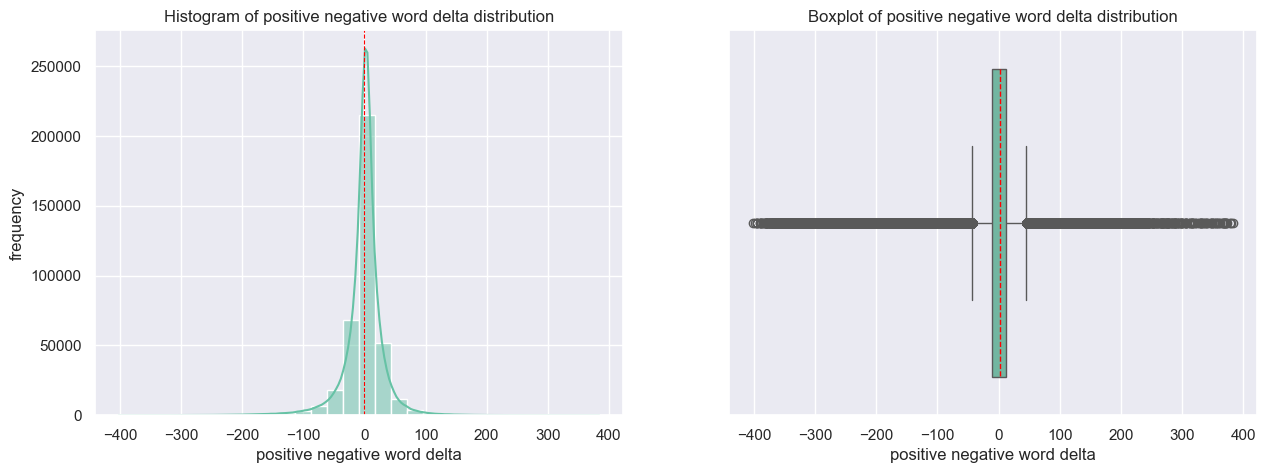

In [111]:
draw_hist_box(df=df[df['sample']==1], attr='positive_negative_word_delta', bins=30)

The distribution looks normal, with both median and mean approximating towards 0 delta. This means that, on average, reviewers provide similar amount of words for the positive and negative sides of their review.

However, we can see numerous outliers, spreading for as much as ~-400 and ~400 words difference respectively (negative values appear when negative part of the review has more words when the positive).

#### Days since review

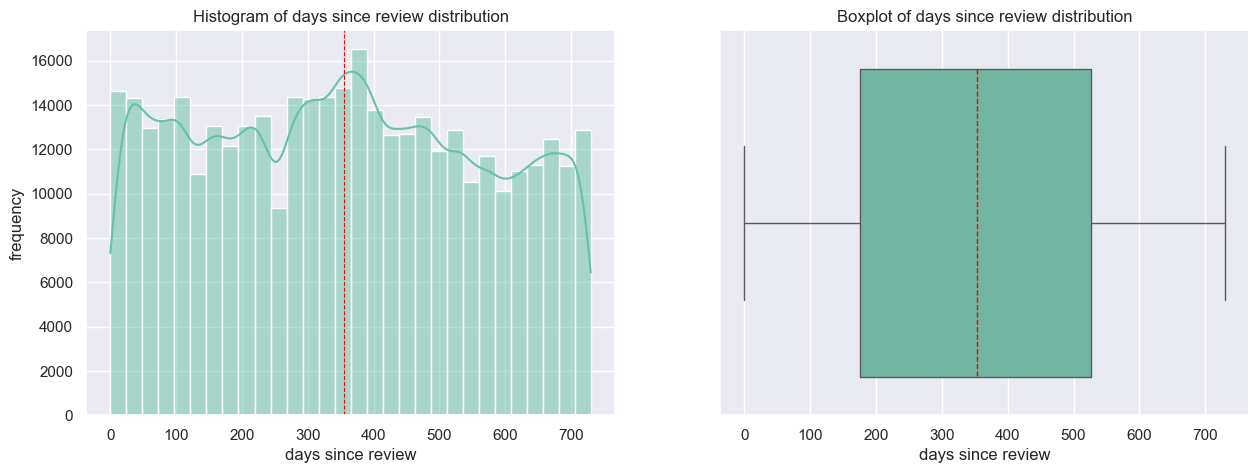

In [112]:
draw_hist_box(df=df[df['sample']==1], attr='days_since_review', bins=30)

In [113]:
df[df['days_since_review']<10].filter(items=['review_date', 'days_since_review'])

review_date  days_since_review
45      2017-07-29                  5
116     2017-08-01                  2
160     2017-07-31                  3
164     2017-07-25                  9
232     2017-08-01                  2
...            ...                ...
513114  2017-08-02                  1
513119  2017-07-31                  3
513147  2017-07-25                  9
513264  2017-08-02                  1
513315  2017-08-03                  0

[8208 rows x 2 columns]

For now, I don't really understand what this attribute really means: 
> продолжительность между датой проверки и датой очистки

I'm not sure what it is, but I assume this is the number of days between the review was posted and some target event. Since I don't understand this attribute fully, I won't permute it in any way for now.

#### Review date

The review date has a format "YYYY-MM-DD", so let's extract a few things into separate attributes:
- year
- month
- day of the week
- day of the month
- day of the year
- season (whether winter, spring etc.)

In [114]:
def get_season(month: int) -> str:
    if month == 12 or month < 3:
        return 'winter'
    elif month > 2 and month < 6:
        return 'spring'
    elif month > 5 and month < 9:
        return 'summer'
    else:
        return 'autumn'

df['year'] = df['review_date'].dt.year
df['month'] = df['review_date'].dt.month
df['day_week'] = df['review_date'].dt.day_of_week
df['day_month'] = df['review_date'].dt.day
df['day_year'] = df['review_date'].dt.day_of_year
df['season'] = df['month'].apply(get_season)

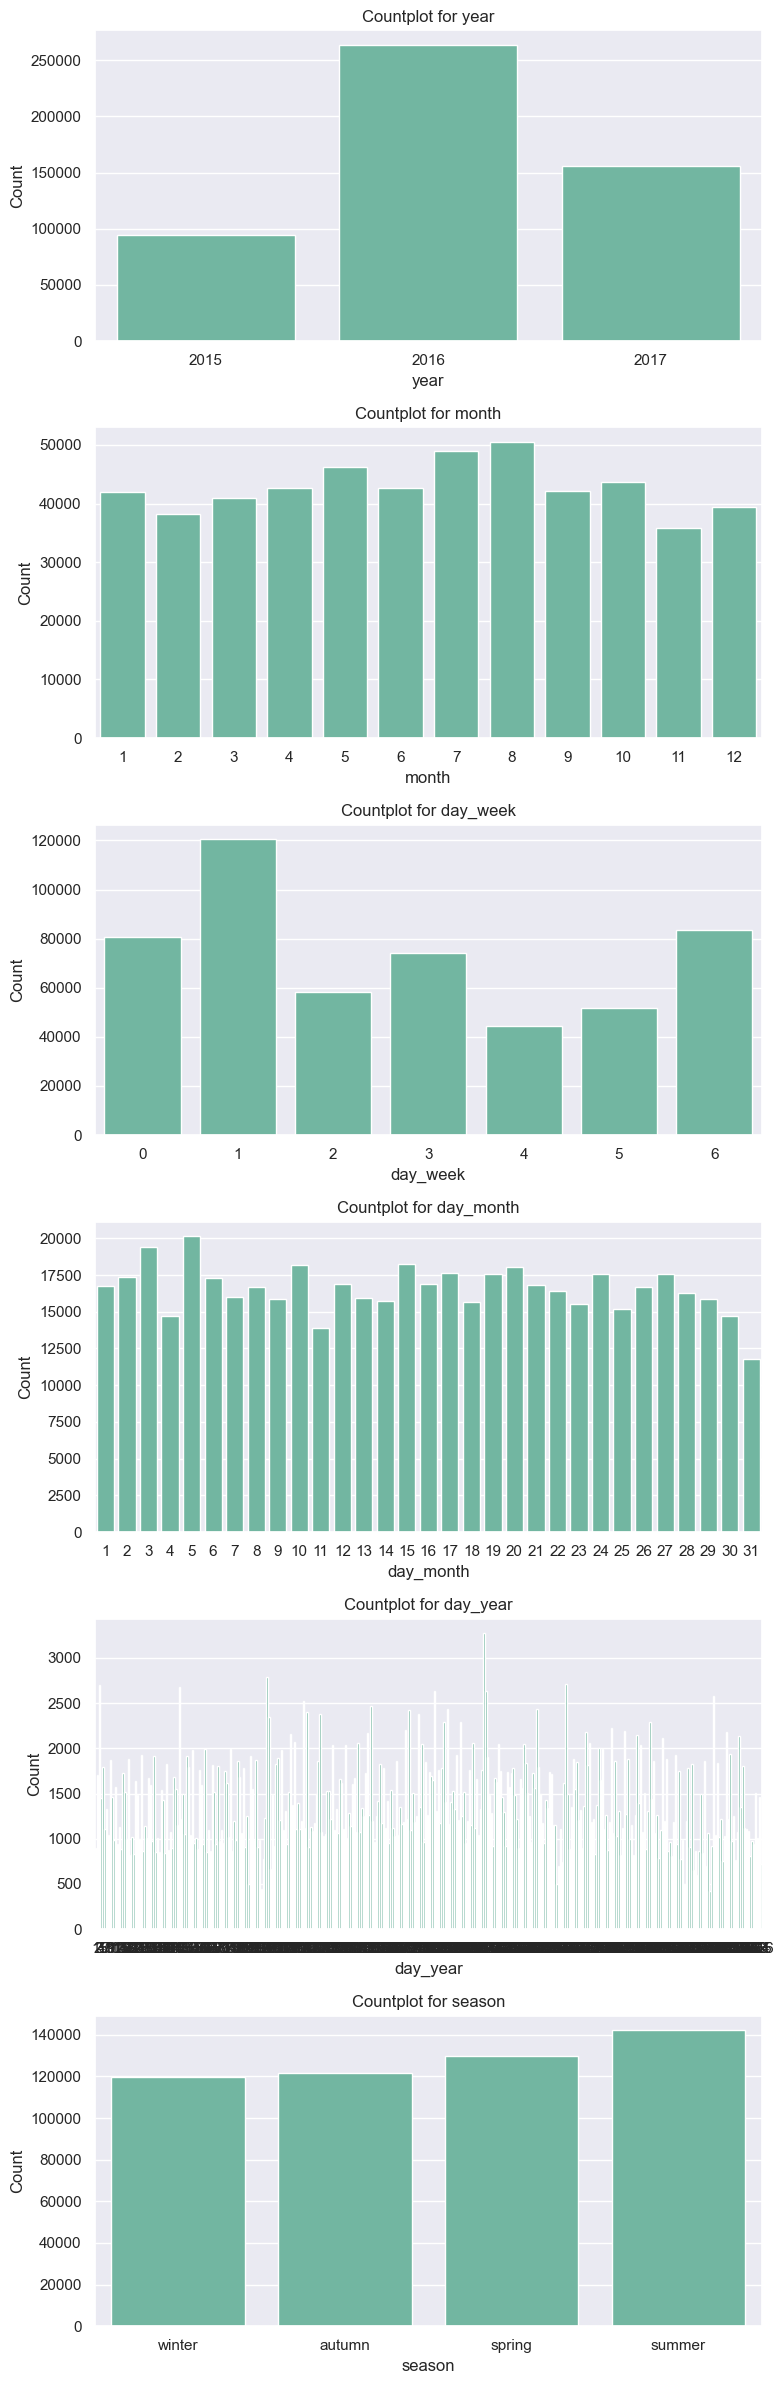

In [115]:
time_attrs = ['year', 'month', 'day_week', 'day_month', 'day_year', 'season']
num_plots = len(time_attrs)

fig, axes = plt.subplots(num_plots, 1, figsize=(8, 4*num_plots))

if num_plots == 1:
    axes = [axes]
    
for ax, attr in zip(axes, time_attrs):
    sns.countplot(x=df[attr], ax=ax)
    ax.set_title(f'Countplot for {attr}')
    ax.set_xlabel(attr)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Some observations:**
- The most of reviews in the datatest are dated to 2016
- Tuesday is the most popular day for writing a review for some reason
- Number of reviewers is the least in winter and the most in summer

In [116]:
df.drop(['review_date'], axis=1, inplace=True)

#### Reviewer nationality

In [117]:
# function for displaying countplot for categorical attributes
def draw_countplot(df: pd.DataFrame, attr: str, order: None):
    attr_name = " ".join(attr.split('_'))
    
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=attr, order=order)
    
    plt.title(f'Countplot for {attr_name}')
    plt.xlabel(attr_name)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    
    plt.show()

In [118]:
print("Total number of reviewer nationalities:", df['reviewer_nationality'].nunique())

Total number of reviewer nationalities: 227


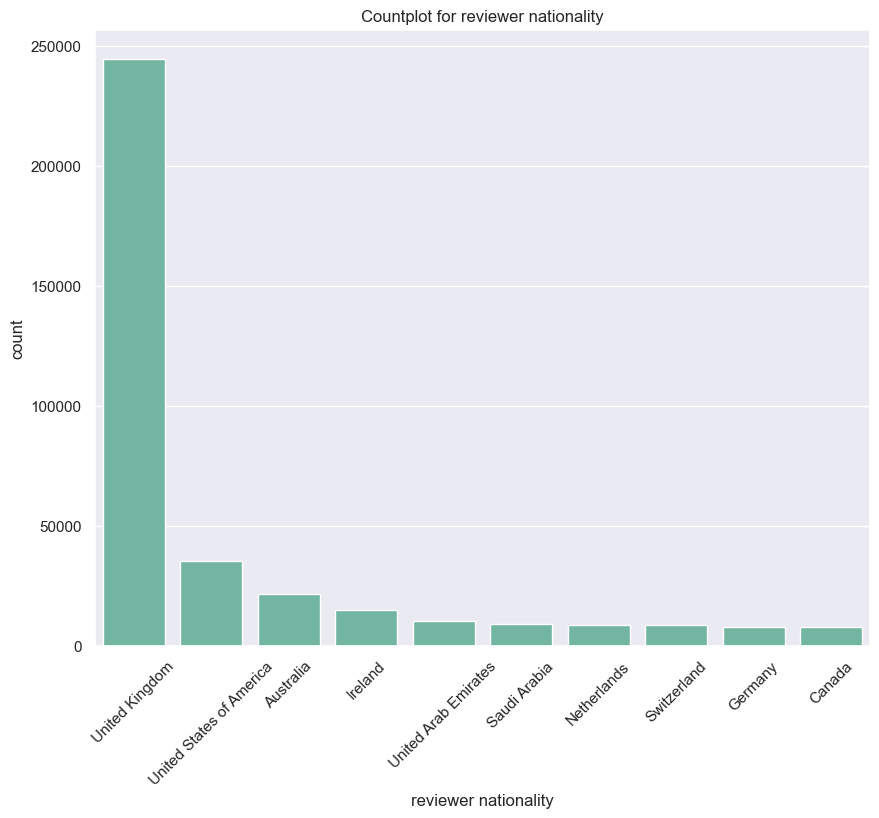

In [119]:
# removing spaces from the reviewer nationalities in the beggining/end
df['reviewer_nationality'] = df['reviewer_nationality'].apply(lambda x: " ".join(x.split(" ")[1:-1]))
# draw countplot for top 10 reviewer nationalities
top_10 = df['reviewer_nationality'].value_counts().sort_values(ascending=False).nlargest(10).index
df_filtered = df[df['reviewer_nationality'].isin(top_10)]

draw_countplot(df=df_filtered, attr='reviewer_nationality', order=top_10)

Majority of reviewers are from United Kingdom, with the USA, Australia and Ireland following. Then, the difference between further places gets relatively insignificant.

Two things to do:
1. Create a boolean attribute with 1 if the country of the hotel is the same as the reviewer nationality (will be checking for the nationality-based bias); 0 - if not;
2. Retain top-10 reviewer nationalities, mark the rest as Other

In [120]:
df['same_reviewer_country'] = (df['country'] == df['reviewer_nationality']).astype(int)
df['reviewer_nationality'] = df['reviewer_nationality'].apply(lambda x: x if x in top_10 else 'Other')

#### Negative and Positive reviews

In [121]:
display(df['positive_review'].value_counts().nlargest(10).index.unique())
display(df['negative_review'].value_counts().nlargest(10).index.unique())

Index(['No Positive', ' Location', ' Everything', ' location', ' Nothing',
       ' The location', ' Great location', ' Good location', ' Location ',
       ' Everything '],
      dtype='object', name='positive_review')

Index(['No Negative', ' Nothing', ' Nothing ', ' nothing', ' N A', ' None',
       ' ', ' N a', ' Breakfast', ' Small room'],
      dtype='object', name='negative_review')

Apart from 'No Positive' and 'No Negative' we have other ways reviewers said they hadn't had a negative experience. We need to mark ```is_positive``` and ```is_negative``` as False (0) for those reviews as well:

In [122]:
no_positive_lst = ['No Positive', ' Nothing', ' nothing']
no_negative_lst = ['No Negative', ' Nothing', ' Nothing ', ' nothing', ' nothing ', ' N A', ' None', ' ', ' N a']

df['is_positive'] = df['positive_review'].apply(lambda x: 0 if x in no_positive_lst else 1)
df['is_negative'] = df['negative_review'].apply(lambda x: 0 if x in no_negative_lst else 1)

Now, it's interesting to see which words are the most popular in both positive and negative reviews. Then, for the most popular keywords, we'll create boolean attributes to see whether those words are included in the review.

In [123]:
# takes a text attribute and returns a ordered dict with keys being kewords and values being count of those keywords in the attribute column
def keywords_count(col: pd.Series) -> OrderedDict:
    # dumping all keywords into the list
    keywords_lst = []
    for row in col:
        keywords_lst.extend(row.split(" "))

    # counting keywords
    keywords_cnt = Counter()
    for keyword in keywords_lst:
        keywords_cnt[keyword.lower()] += 1
     
    # dumping keywords and their counts into ordered dict   
    keywords_dict = OrderedDict(sorted(keywords_cnt.items(), key=lambda x: x[1], reverse=True))
    
    return keywords_dict

Let's take 10 descriptive words from both positive and negative dicts and creating boolean attributes for each:

In [125]:
positive_keywords = ['staff', 'very', 'location', 'room', 'good', 'great', 'friendly', 'breakfast' ,'helpful', 'nice']
negative_keywords = ['no', 'room', 'very', 'breakfast', 'small', 'staff', 'bed', 'bathroom', 'shower', 'service']

# returns True if keyword is present in text, else False
def check_for_keyword(text: str, keyword: str) -> bool:
    return int(keyword in text.lower())

for keyword in positive_keywords:
    df[f'positive_{keyword}'] = df['positive_review'].apply(lambda x: check_for_keyword(x, keyword))
    
for keyword in negative_keywords:
    df[f'negative_{keyword}'] = df['negative_review'].apply(lambda x: check_for_keyword(x, keyword))

Now, let's introduce 2 attributes measuring negative and positive reviews sentiments for each record, using the nltk lib. Props to https://www.kaggle.com/code/sanyakc/project-eda for the idea.

In [126]:
# loading lexicon and adding popular positive & negative words from reviews
nltk.download('vader_lexicon')
custom_lexicon = {
    'comfy': 2.5,
    'simple': 1.0,
    'quiet': 1.0,
    'modern': 1.0,
    'little': -0.3,
    'cold': -1.0,
    'slow': -0.5
}

# creating positive & negative analyzer objects
positive_analyzer = SentimentIntensityAnalyzer()
negative_analyzer = SentimentIntensityAnalyzer()

# updating lexicon with the above items
positive_analyzer.lexicon.update(custom_lexicon)
negative_analyzer.lexicon.update(custom_lexicon)

def get_sentiments(df: pd.DataFrame, attr: str, analyzer: SentimentIntensityAnalyzer, prefix: str) -> pd.DataFrame:
    sentiments = df[attr].apply(analyzer.polarity_scores).apply(pd.Series)
    sentiments.columns = [f'{prefix}_{col}' for col in sentiments.columns]
    return sentiments

negative_sentiments = get_sentiments(df=df, attr='negative_review', analyzer=negative_analyzer, prefix='negative_sentiment')
positive_sentiments = get_sentiments(df=df, attr='positive_review', analyzer=positive_analyzer, prefix='positive_sentiment')
df = pd.concat([df, negative_sentiments, positive_sentiments], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Now that we extracted keywords from both negative and positive reviews and added the sentiments, we can drop the review text columns because they are too unique to bear any more value for the model:

In [127]:
df.drop(['positive_review', 'negative_review'], axis=1, inplace=True)

#### Tags
**Each tag record contains:**
- trip type
- trip group (e.g. couple, solo, friends etc.)
- type of room
- number of nights spent
- *optional:* whether review submitted from mobile

Let's split the tags feature into 5 respective features.

In [128]:
trip_groups = ['Couple', 'Solo traveler', 'Group', 
               'Family with young children', 'Family with older children', 'Travelers with friends', 'With a pet']

def split_tag(tag):
    trip_info = eval(tag)
    
    trip_type, trip_group, room, nights, mobile_submission = None, None, None, None, None
    
    for el in trip_info:
        if el.strip() in trip_groups:
            trip_group = el
        elif 'trip' in el:
            trip_type = "_".join(el.strip().lower().split(" "))
        elif 'night' in el:
            nights = el
        elif 'mobile device' in el:
            mobile_submission = 1
        else:
            room = el
         
    return trip_type, trip_group, room, nights, mobile_submission

df[['trip_type', 'trip_group', 'room', 'nights', 'mobile_submission']] = df['tags'].apply(split_tag).apply(pd.Series)

In [129]:
df[['trip_type', 'trip_group', 'room', 'nights', 'mobile_submission']].info()
df[['trip_type', 'trip_group', 'room', 'nights', 'mobile_submission']].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513382 entries, 0 to 513381
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_type          498437 non-null  object 
 1   trip_group         513382 non-null  object 
 2   room               513166 non-null  object 
 3   nights             513190 non-null  object 
 4   mobile_submission  306284 non-null  float64
dtypes: float64(1), object(4)
memory usage: 19.6+ MB


trip_type       trip_group                               room  \
0   leisure_trip          Couple                       Studio Suite    
1  business_trip          Couple               Standard Double Room    
2   leisure_trip   Solo traveler            Modern Double Room Echo    
3   leisure_trip   Solo traveler    Standard Room with 1 Double Bed    
4  business_trip          Couple       Standard Double or Twin Room    
5  business_trip   Solo traveler                 Superior Twin Room    
6   leisure_trip          Couple            Double Room Non Smoking    
7   leisure_trip          Couple               Superior Double Room    
8   leisure_trip          Couple                        Double Room    
9   leisure_trip          Couple             Twin Hilton Guest Room    

              nights  mobile_submission  
0   Stayed 2 nights                 1.0  
1    Stayed 1 night                 NaN  
2   Stayed 3 nights                 1.0  
3    Stayed 1 night                 NaN  
4   Stayed 6 nights                 NaN  
5    Stayed 1 night                 1.0  
6    Stayed 1 night                 1.0  
7   Stayed 4 nights                 NaN  
8    Stayed 1 night                 NaN  
9    Stayed 1 night                 1.0

Now, need to perform the following transformations:
- ```trip_type```: fill NaN with Other
- ```room```: room, suite, studio, other
- ```nights```: only integer of the number of nights (if no nights found, put -1)
- ```mobile_submission```: fill NaN with 0, meaning the review was submitted from desktop

In [130]:
df['trip_type'] = df['trip_type'].fillna('Other')

In [131]:
def get_apartment_type(room: str):
    room = room.lower()
    if 'room' in room:
        return 'room'
    elif 'suite' in room:
        return 'suite'
    elif 'studio' in room:
        return 'studio'
    
    return 'other'

df['room'] = df['room'].fillna('other')
df['room'] = df['room'].apply(get_apartment_type)

In [132]:
def get_nights(nights):
    match = re.search(r"Stayed (\d+) night", nights)
    if match:
        return int(match.group(1))
    return -1

df['nights'] = df['nights'].astype(str).apply(get_nights)

In [133]:
df['mobile_submission'] = df['mobile_submission'].fillna(value=0)
df['mobile_submission'] = df['mobile_submission'].astype(int)

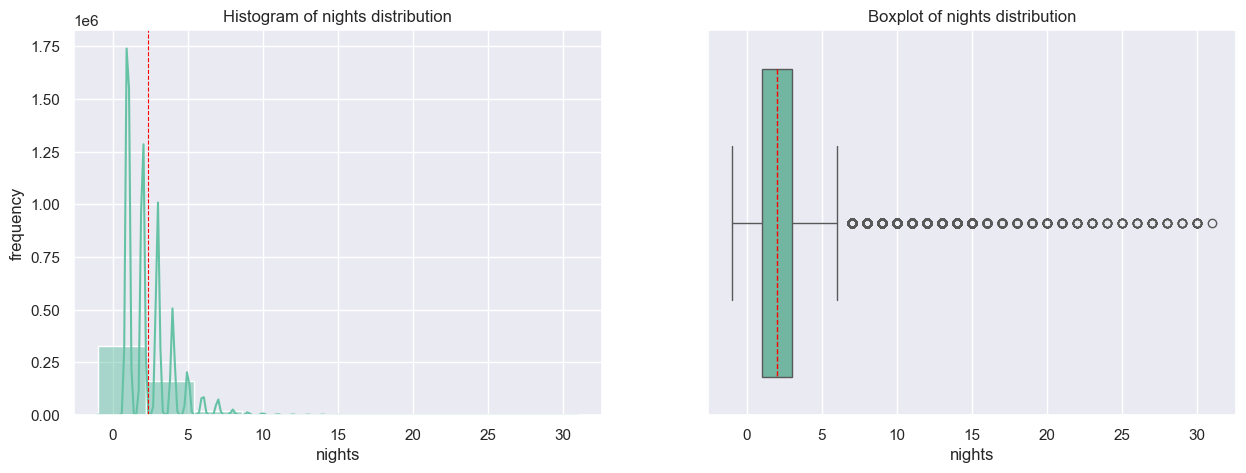

In [134]:
draw_hist_box(df=df, attr='nights', bins=10)

In [135]:
df.drop(['tags'], axis=1, inplace=True)

#### Lat and Lng
Let's cluster hotels based on their ```lat``` and ```lng```. We will have 10 clusters per city.

In [136]:
CLUSTERS = df['city'].nunique() * 10
coordinates = df[['lat', 'lng']]
kmeans = KMeans(n_clusters=CLUSTERS, random_state=42)
kmeans.fit(coordinates)

df['geo_cluster'] = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [137]:
df.drop(['lat', 'lng'], axis=1, inplace=True)

#### Address
We extracted country, city and postcode from the initial address. The new address attribute contains a different froms of combinations of the district, street and building number.

However, assuming ```lat```, ```lng``` and ```postcode``` provide the intel into the district, we might drop the new address attribute (for now), because it's hard to map all the patterns ot extract the above attributes correctly.

In [138]:
df.drop(['address'], axis=1, inplace=True)

In [139]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513382 entries, 0 to 513381
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   additional_number_of_scoring                513382 non-null  int64   
 1   average_score                               513382 non-null  float64 
 2   hotel_name                                  513382 non-null  category
 3   reviewer_nationality                        513382 non-null  object  
 4   review_total_negative_word_counts           513382 non-null  int64   
 5   total_number_of_reviews                     513382 non-null  int64   
 6   review_total_positive_word_counts           513382 non-null  int64   
 7   total_number_of_reviews_reviewer_has_given  513382 non-null  int64   
 8   reviewer_score                              513382 non-null  float64 
 9   days_since_review                           513382 non-null

***
### Feature normalization, standartization
#### Overview
Firstly, let's overview the features and their distribution:

In [140]:
df['hotel_name'] = df['hotel_name'].astype('category')
df['postcode'] = df['postcode'].astype('category')
ProfileReport(df, title='Hotel reviews data profiling report');

#### Normalizing & standartizing numerical features

Before normalizing numerical features, let's understand their correlation to remove those with obvious extreme correlation:

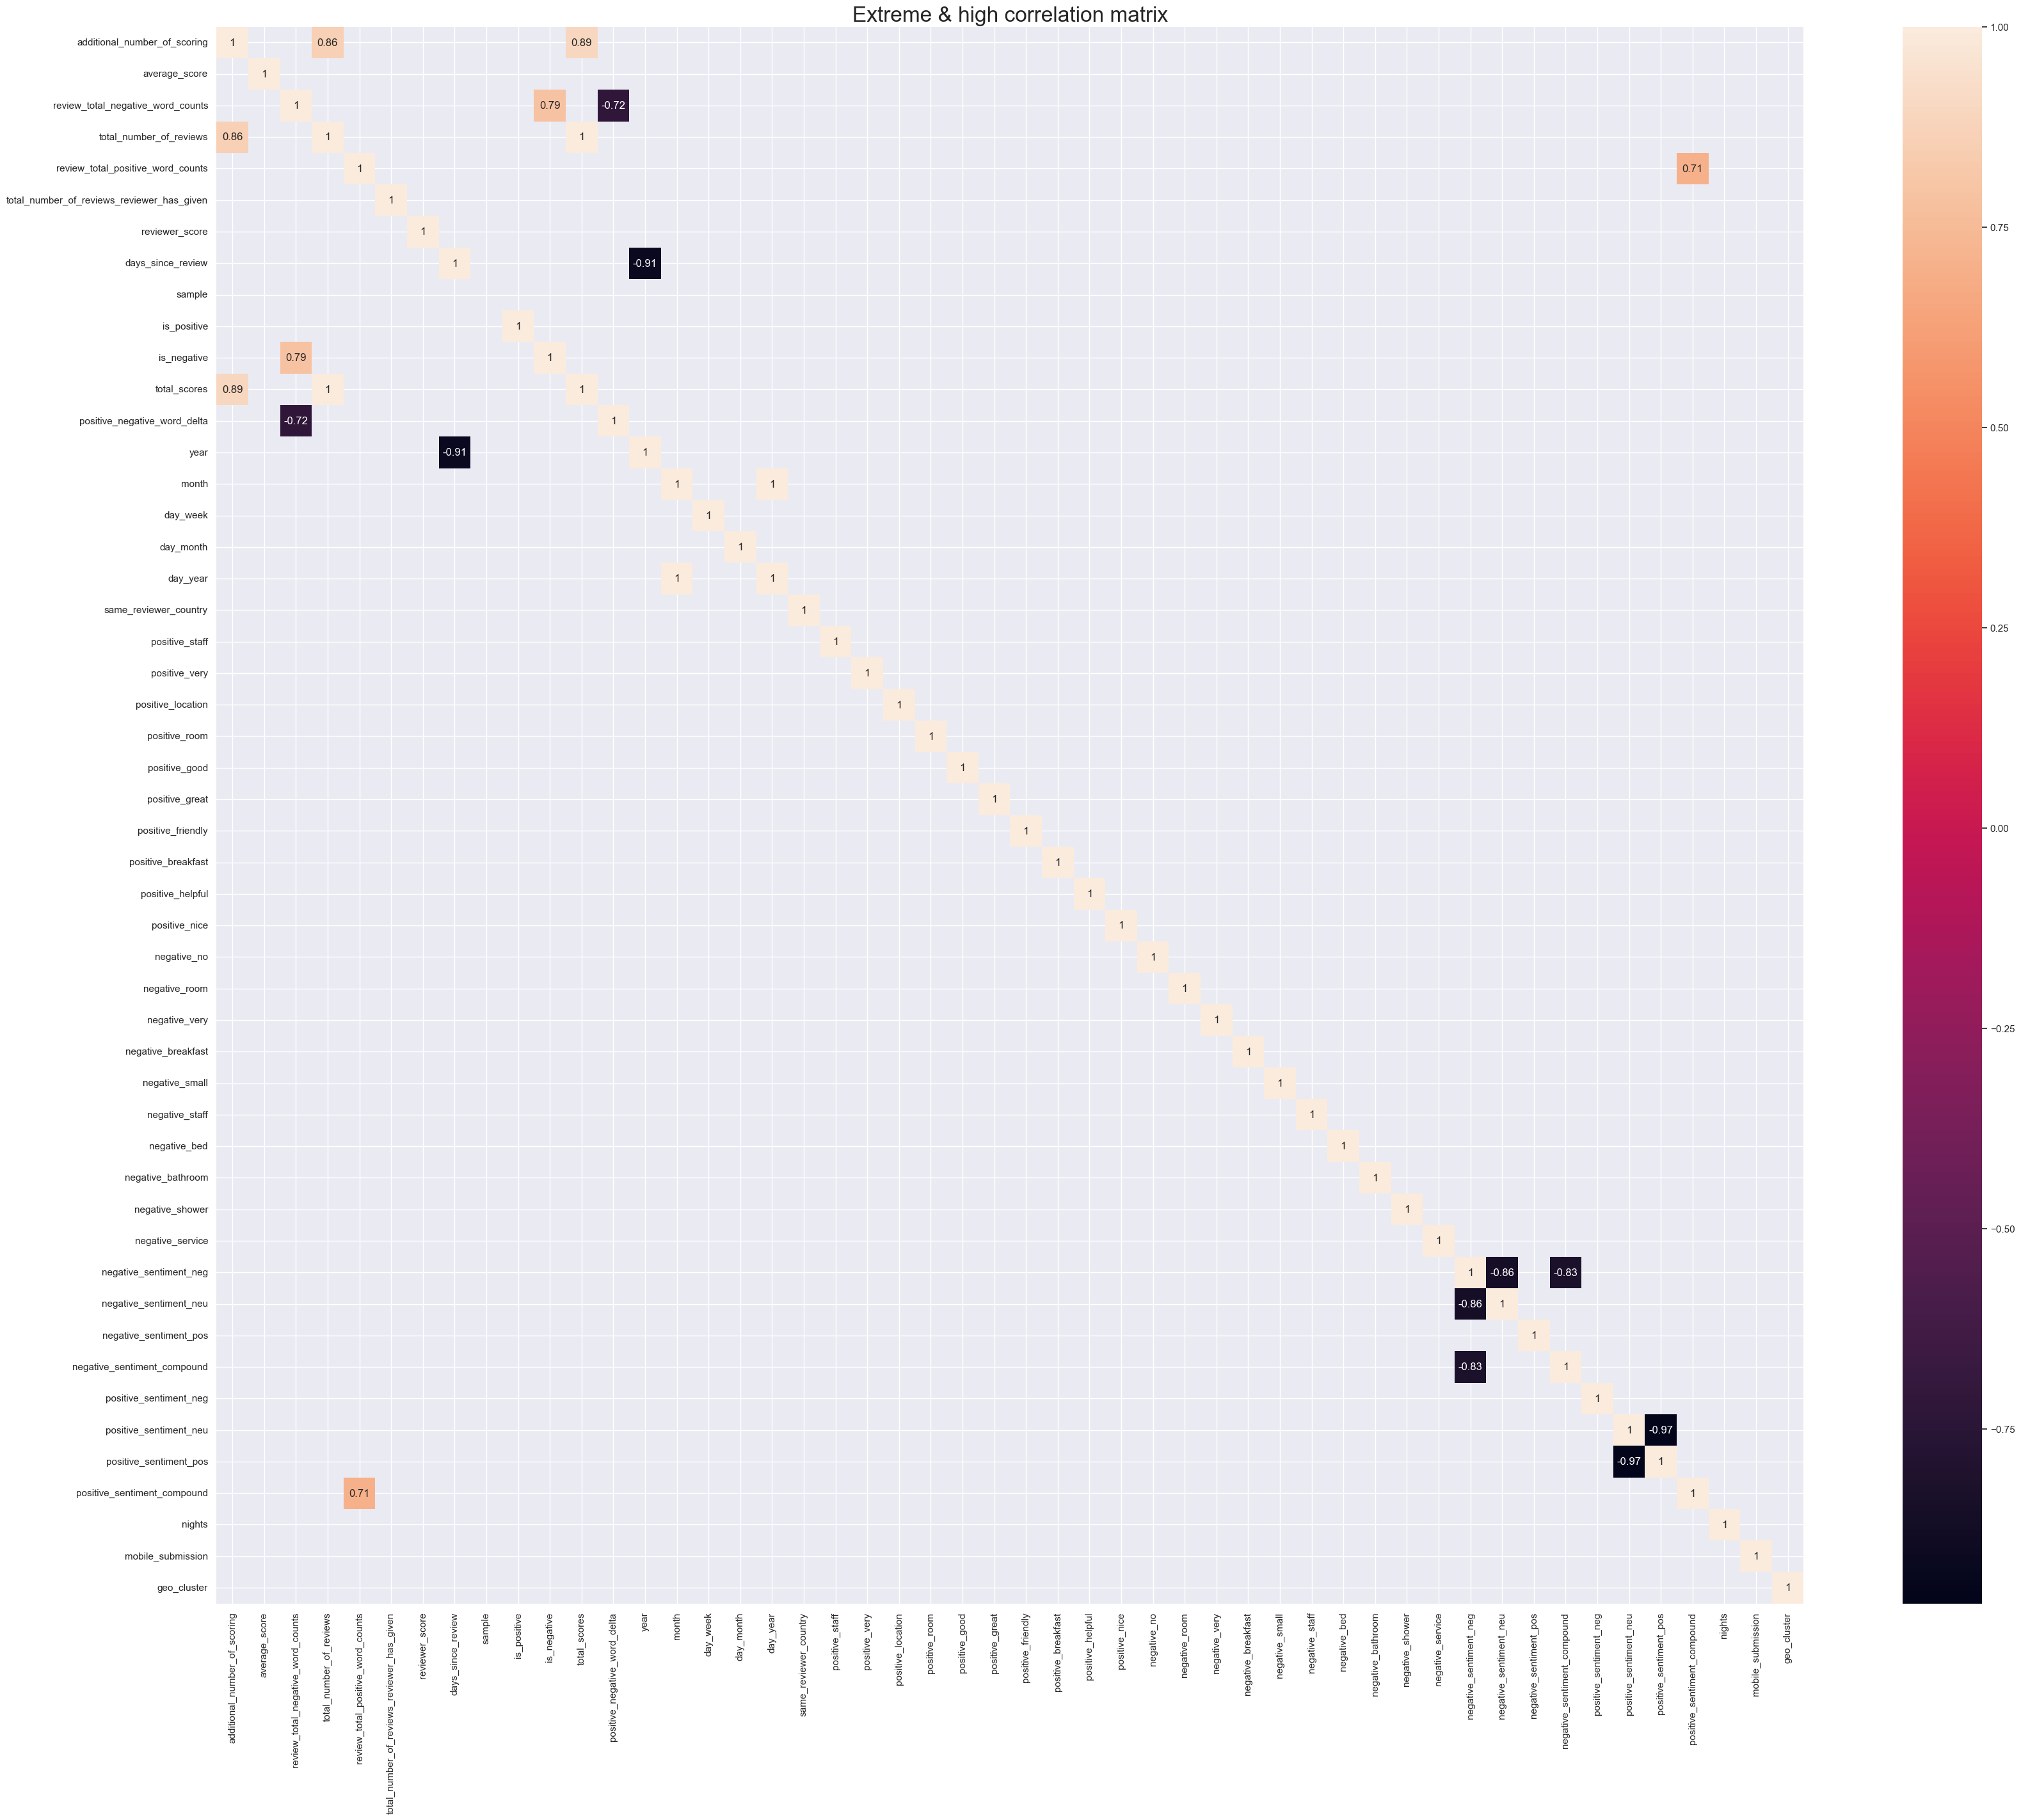

In [141]:
# takes corr matrix, tresholds for correlation score and correlation magnitude (extreme, strong, medium, weak, very week)
def draw_corr_matrix(base_matrix: pd.DataFrame, lower_threshold: float, upper_threshold: float, magnitude: str, annot: None):
    filtered_matrix = base_matrix[((base_matrix >= lower_threshold) & (base_matrix < upper_threshold)) | ((base_matrix <= -lower_threshold) & (base_matrix > -upper_threshold))]
    plt.figure(figsize=(40,32))
    plt.title(f'{magnitude} correlation matrix', fontsize=24)
    sns.heatmap(filtered_matrix, annot=annot)

corr_matrix = df[df['sample']==1].corr(method='spearman', numeric_only=True)
draw_corr_matrix(corr_matrix, 0.7, 1.01, 'Extreme & high', annot=True)

Dropping the following features due to their extreme correlations with others:
- ```additional_number_of_reviews``` and ```total_number_of_reviews``` due to their extreme correlation with ```total_scores```
- ```total_negative_word_counts``` due to its high correlation with ```positive_negative_word_delta```
- ```year``` due to its extreme correlation with ```days_since_review```
- ```day_year``` due to its absolute correlation with ```month```
- ```is_positive``` and ```is_negative``` due to their high & extreme correlations with sentiment features
- ```negative_sentiment_neu``` due to its extreme correlation with ```negative_sentiment_neg```
- ```positive_sentiment_neu``` due to its extreme correlation with ```positive_sentiment_pos```

In [142]:
df.drop(['additional_number_of_scoring', 'total_number_of_reviews', 'review_total_negative_word_counts', 'year', 'day_year', 'is_positive', 'is_negative', 
         'negative_sentiment_neu', 'positive_sentiment_neu'], axis=1, inplace=True)

Normalizing numerical features using Roubst Scaler (except for ```positive_negative_word_delta```) because they are not normally distributed and might have outliers we've not accounted for:

In [143]:
cols_to_scale = ['average_score', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'total_scores', 'month', 'day_week', 'day_month', 'nights', 'geo_cluster']

r_scaler = preprocessing.RobustScaler()
df[cols_to_scale] = r_scaler.fit_transform(df[cols_to_scale])

Standartizing normally distributed ```positive_negative_word_delta```:

In [144]:
s_scaler = preprocessing.StandardScaler()
df['positive_negative_word_delta'] = s_scaler.fit_transform(df[['positive_negative_word_delta']])

***
### Feature encoding

#### Encoding categorical features

Rank cats (Ordinal Encoding):
- N/A

Cats with a small (<=5) number of unique vals (OneHot Encoding):
- ```season```
- ```trip_type```
- ```room```

Cats with a larger (>5) number of unique vals (Binary Encoding):
- ```hotel_name```
- ```reviewer_nationality```
- ```country```
- ```city```
- ```postcode```
- ```trip_group```

In [145]:
# OneHot encoding
cols = ['season', 'trip_type', 'room']
onehot_encoder = ce.OneHotEncoder(cols=cols, use_cat_names=True)
data_bin = onehot_encoder.fit_transform(df[cols])
df = pd.concat([df, data_bin], axis=1)
df.drop(cols, axis=1, inplace=True)

In [146]:
# Binary encoding
cols = ['hotel_name', 'reviewer_nationality', 'country', 'city', 'postcode', 'trip_group']
binary_encoder = ce.BinaryEncoder(cols=cols)
data_bin = binary_encoder.fit_transform(df[cols])
df = pd.concat([df, data_bin], axis=1)
df.drop(cols, axis=1, inplace=True)

Building the correlation matrix again, now with encoded cat features:

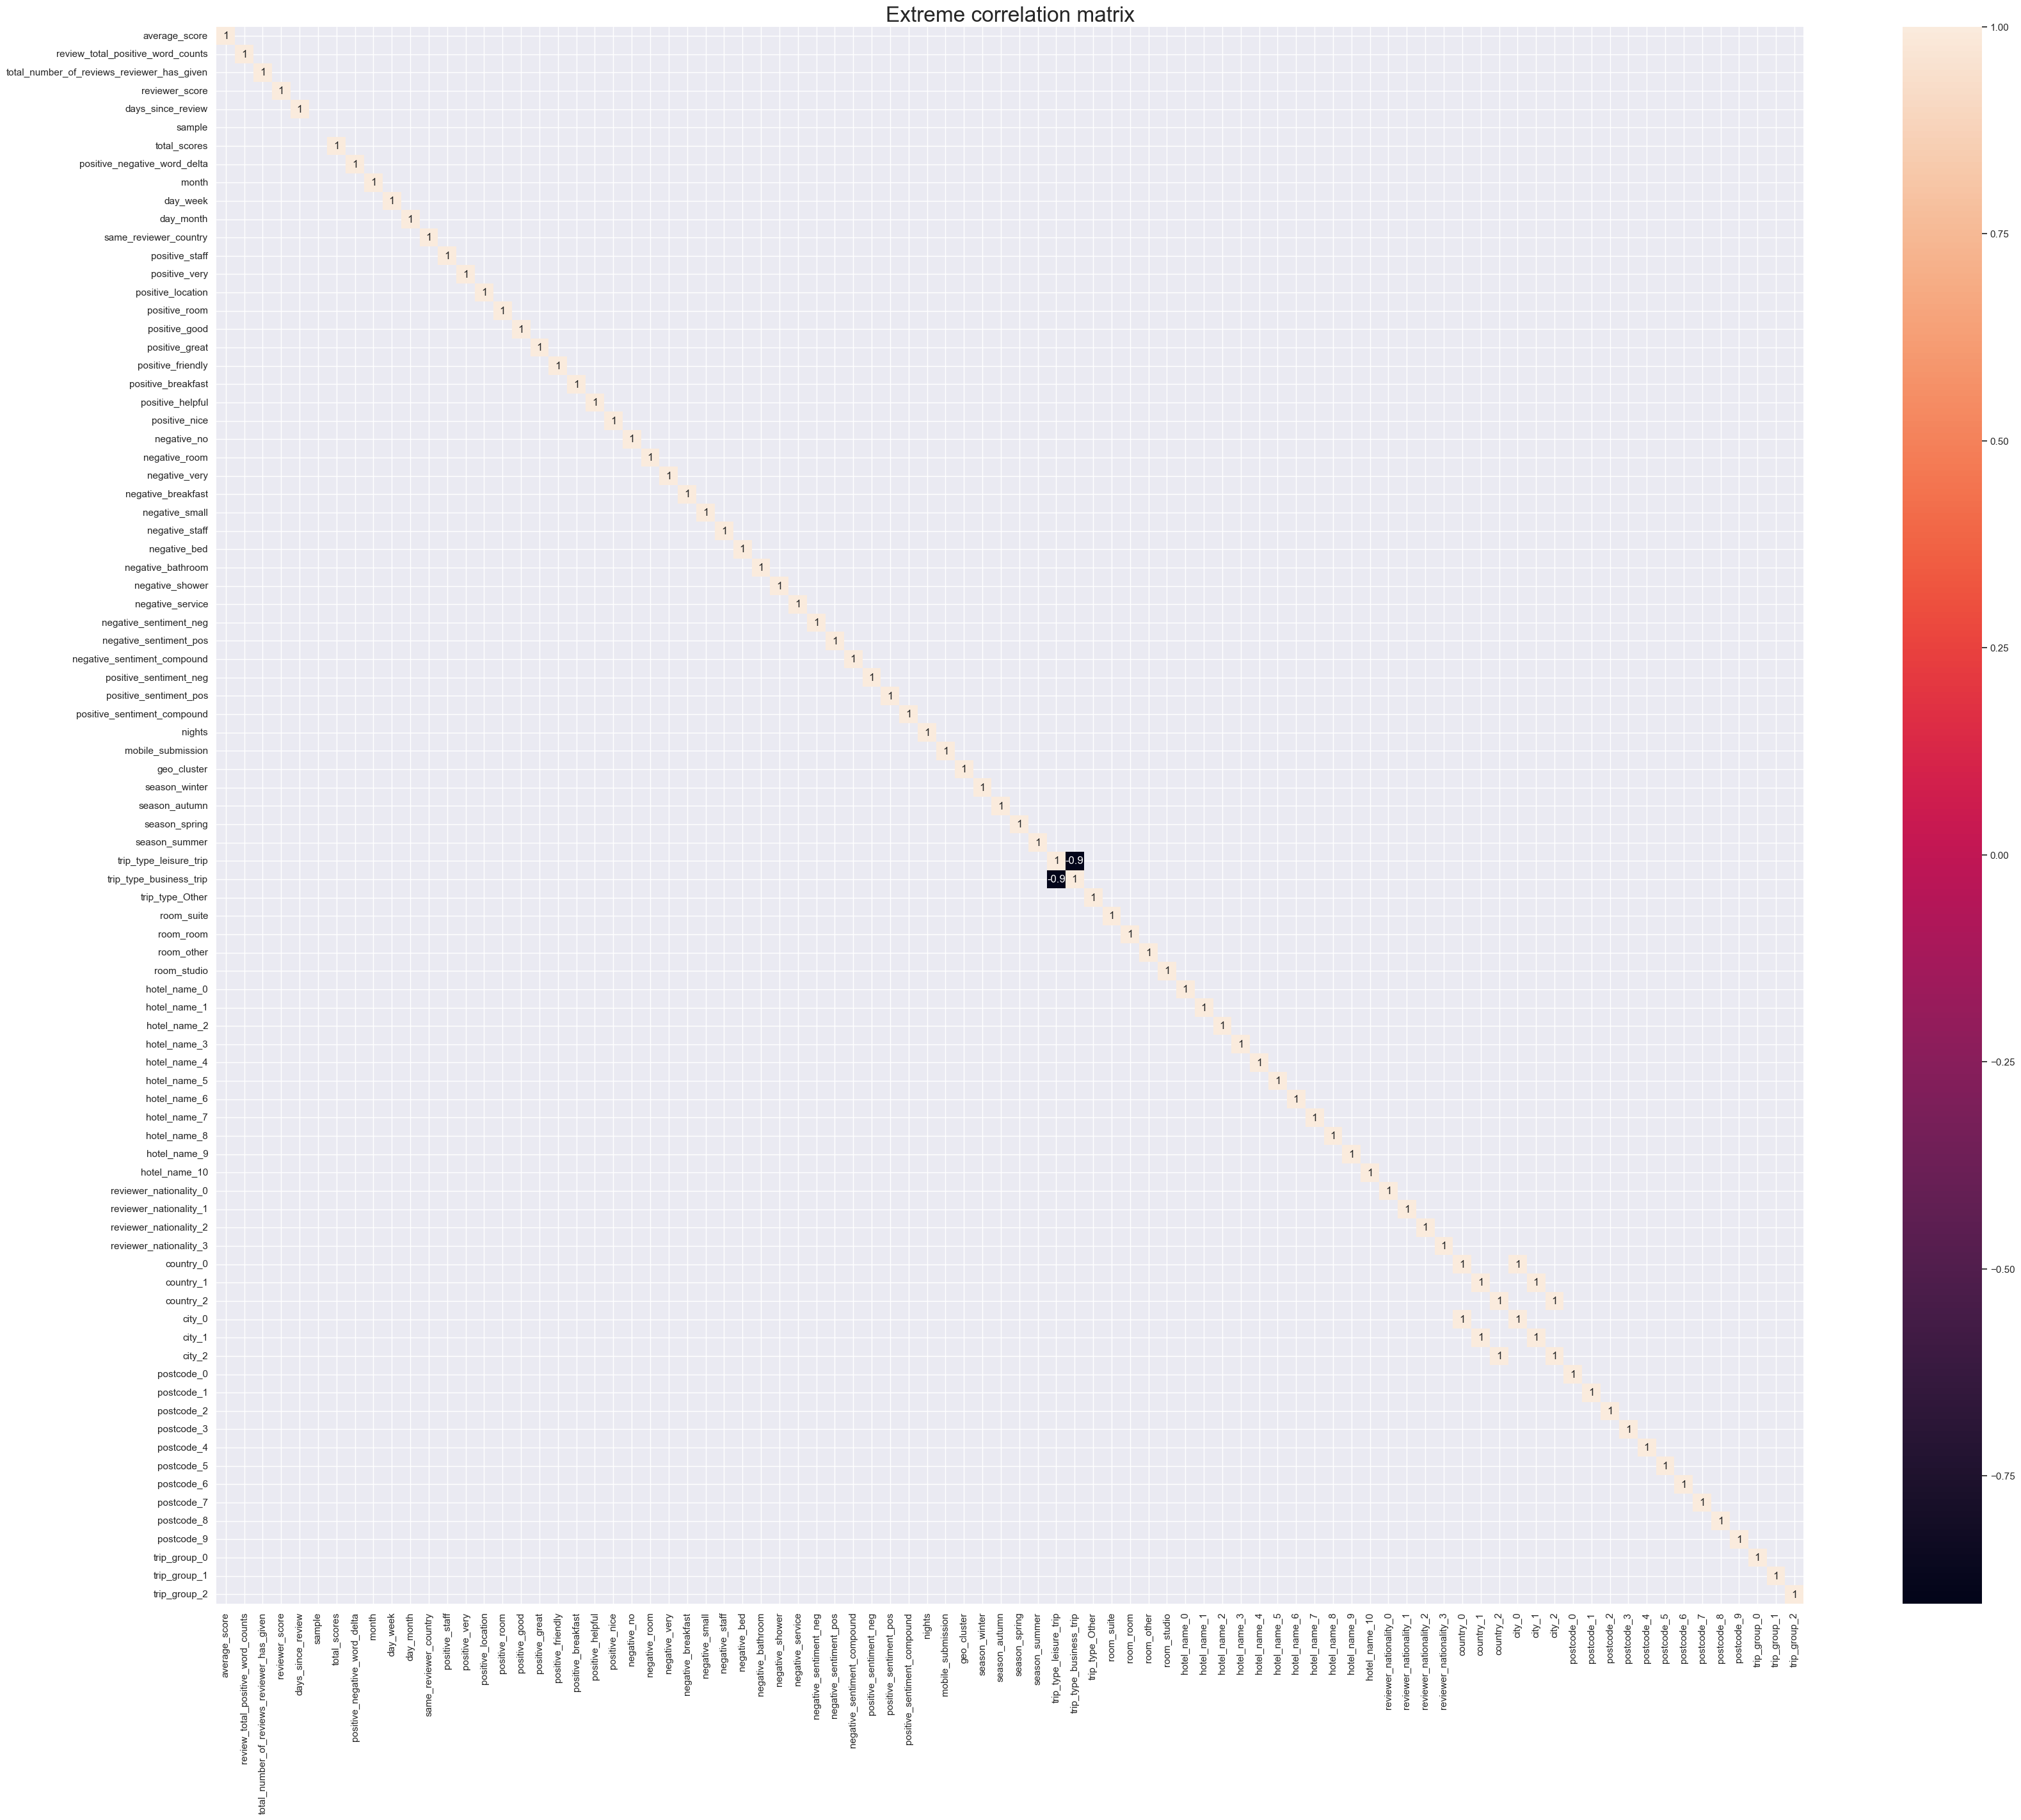

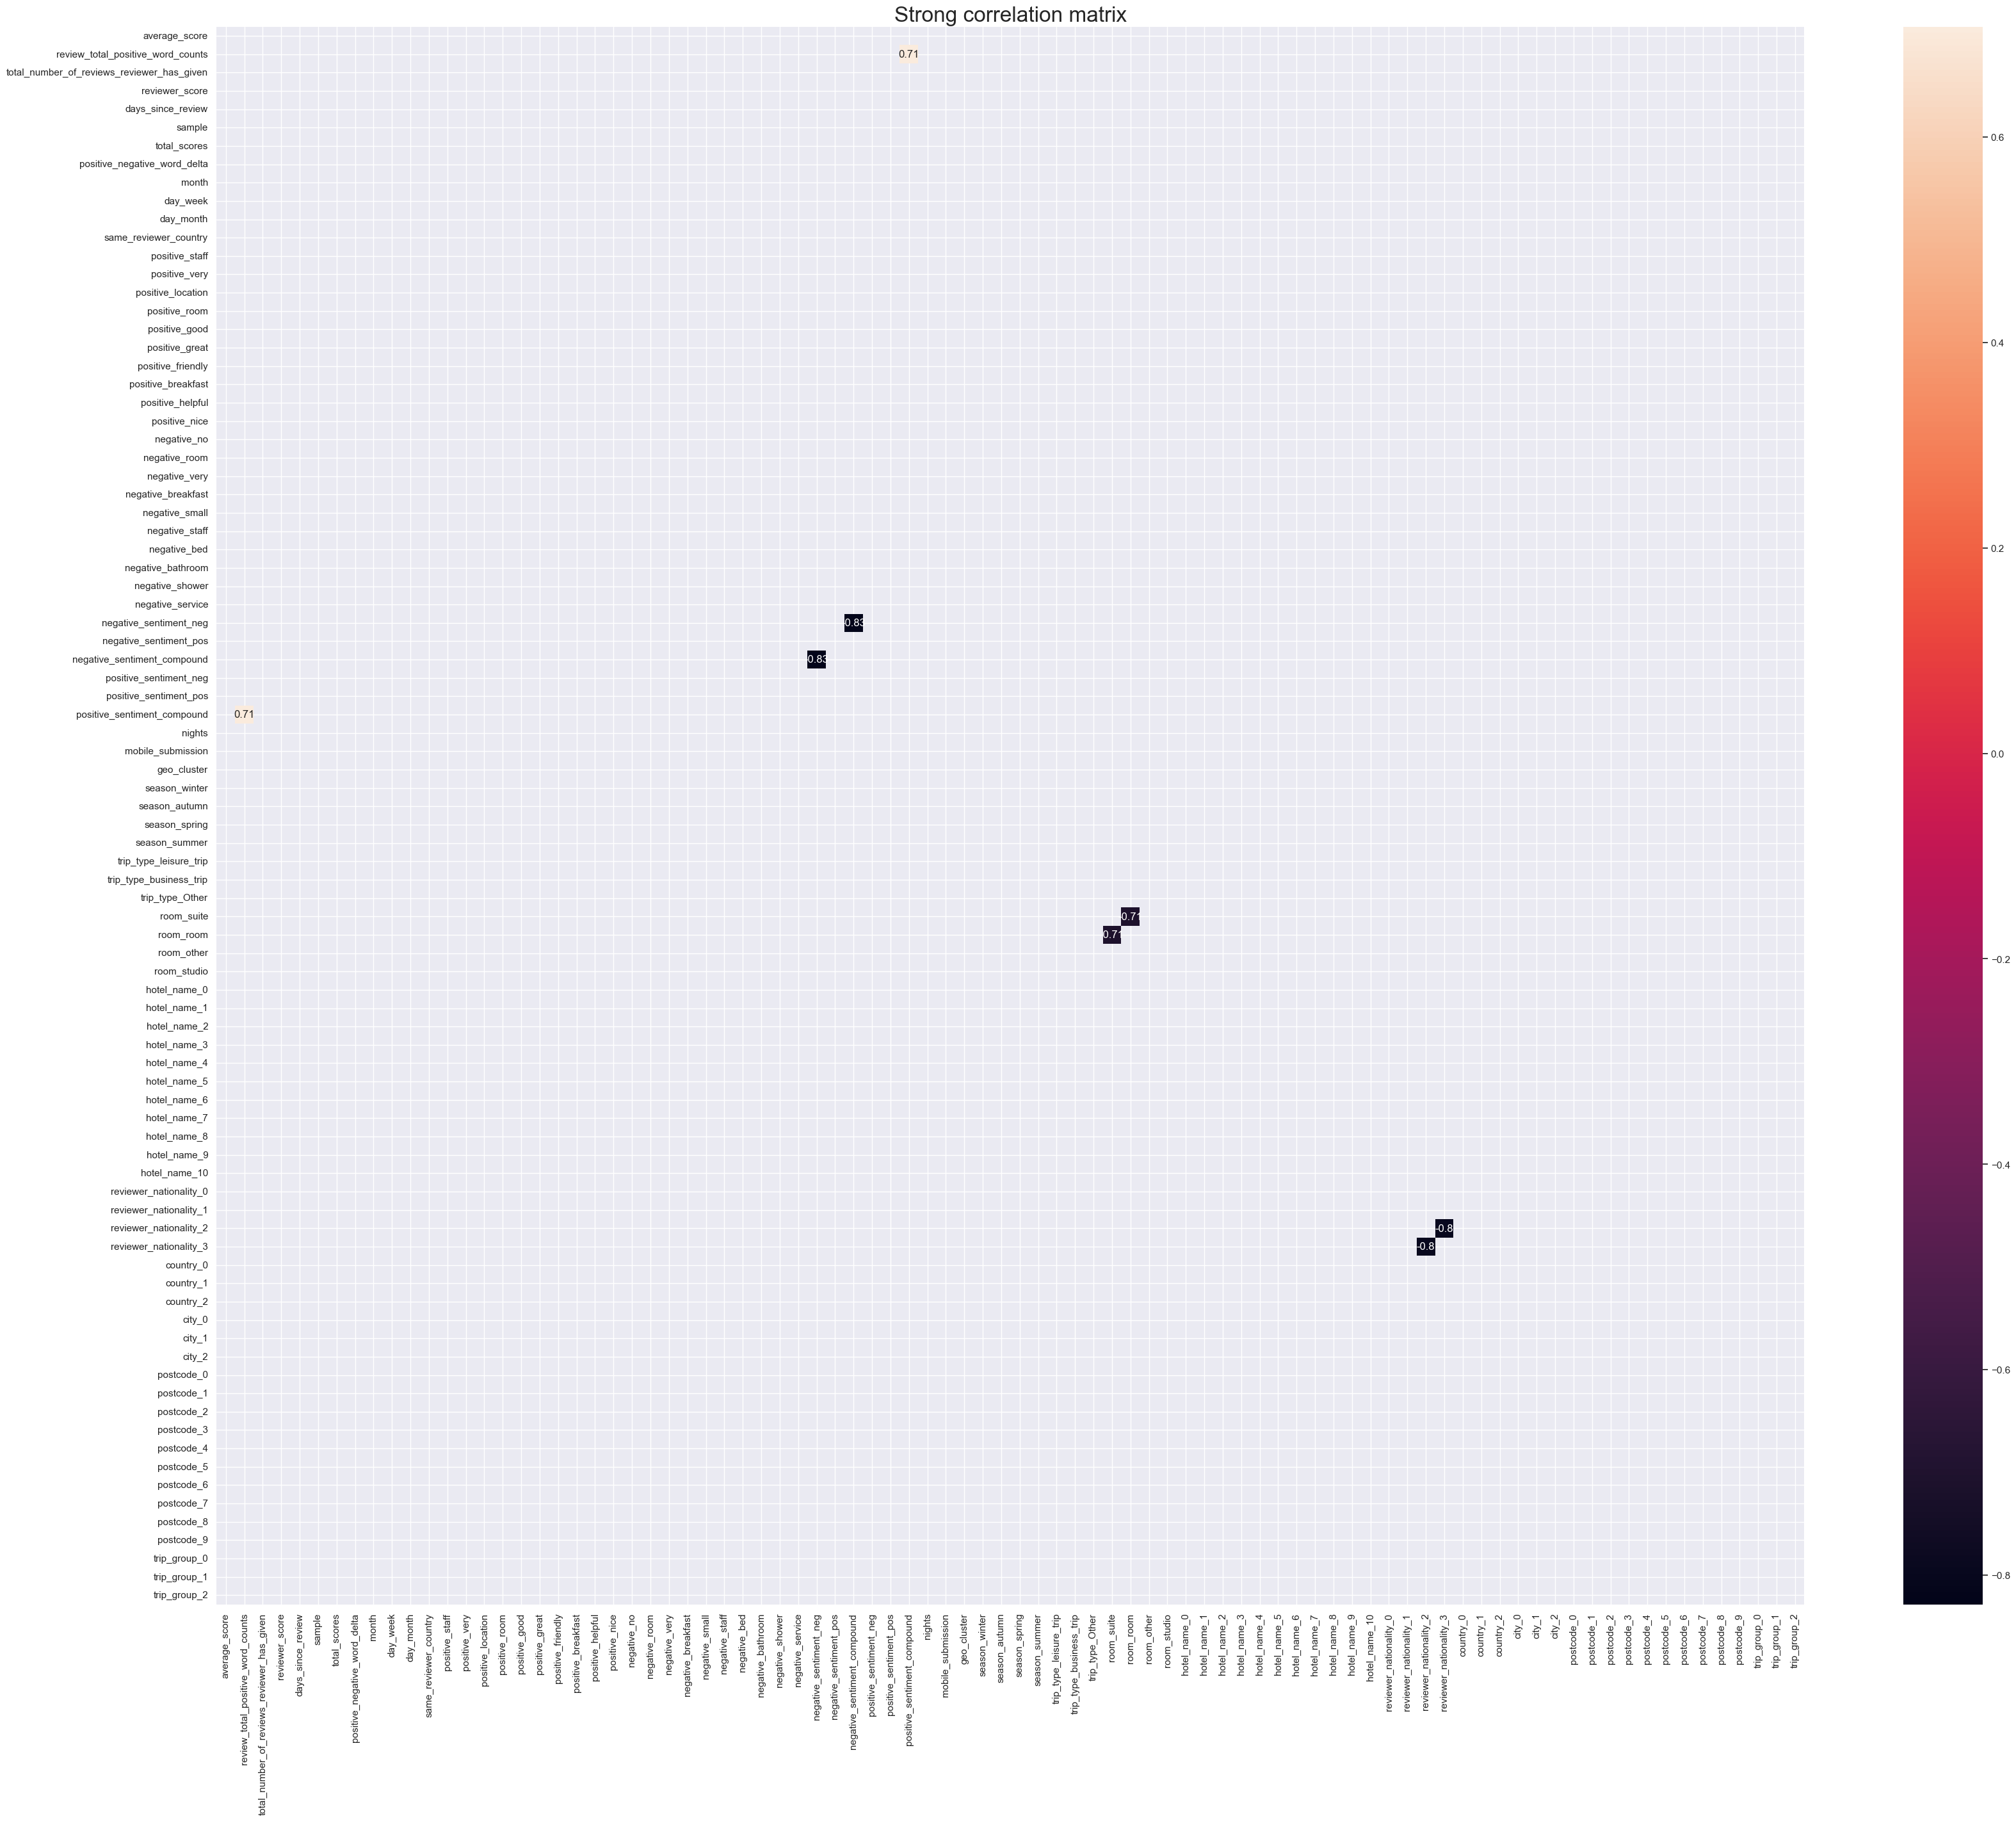

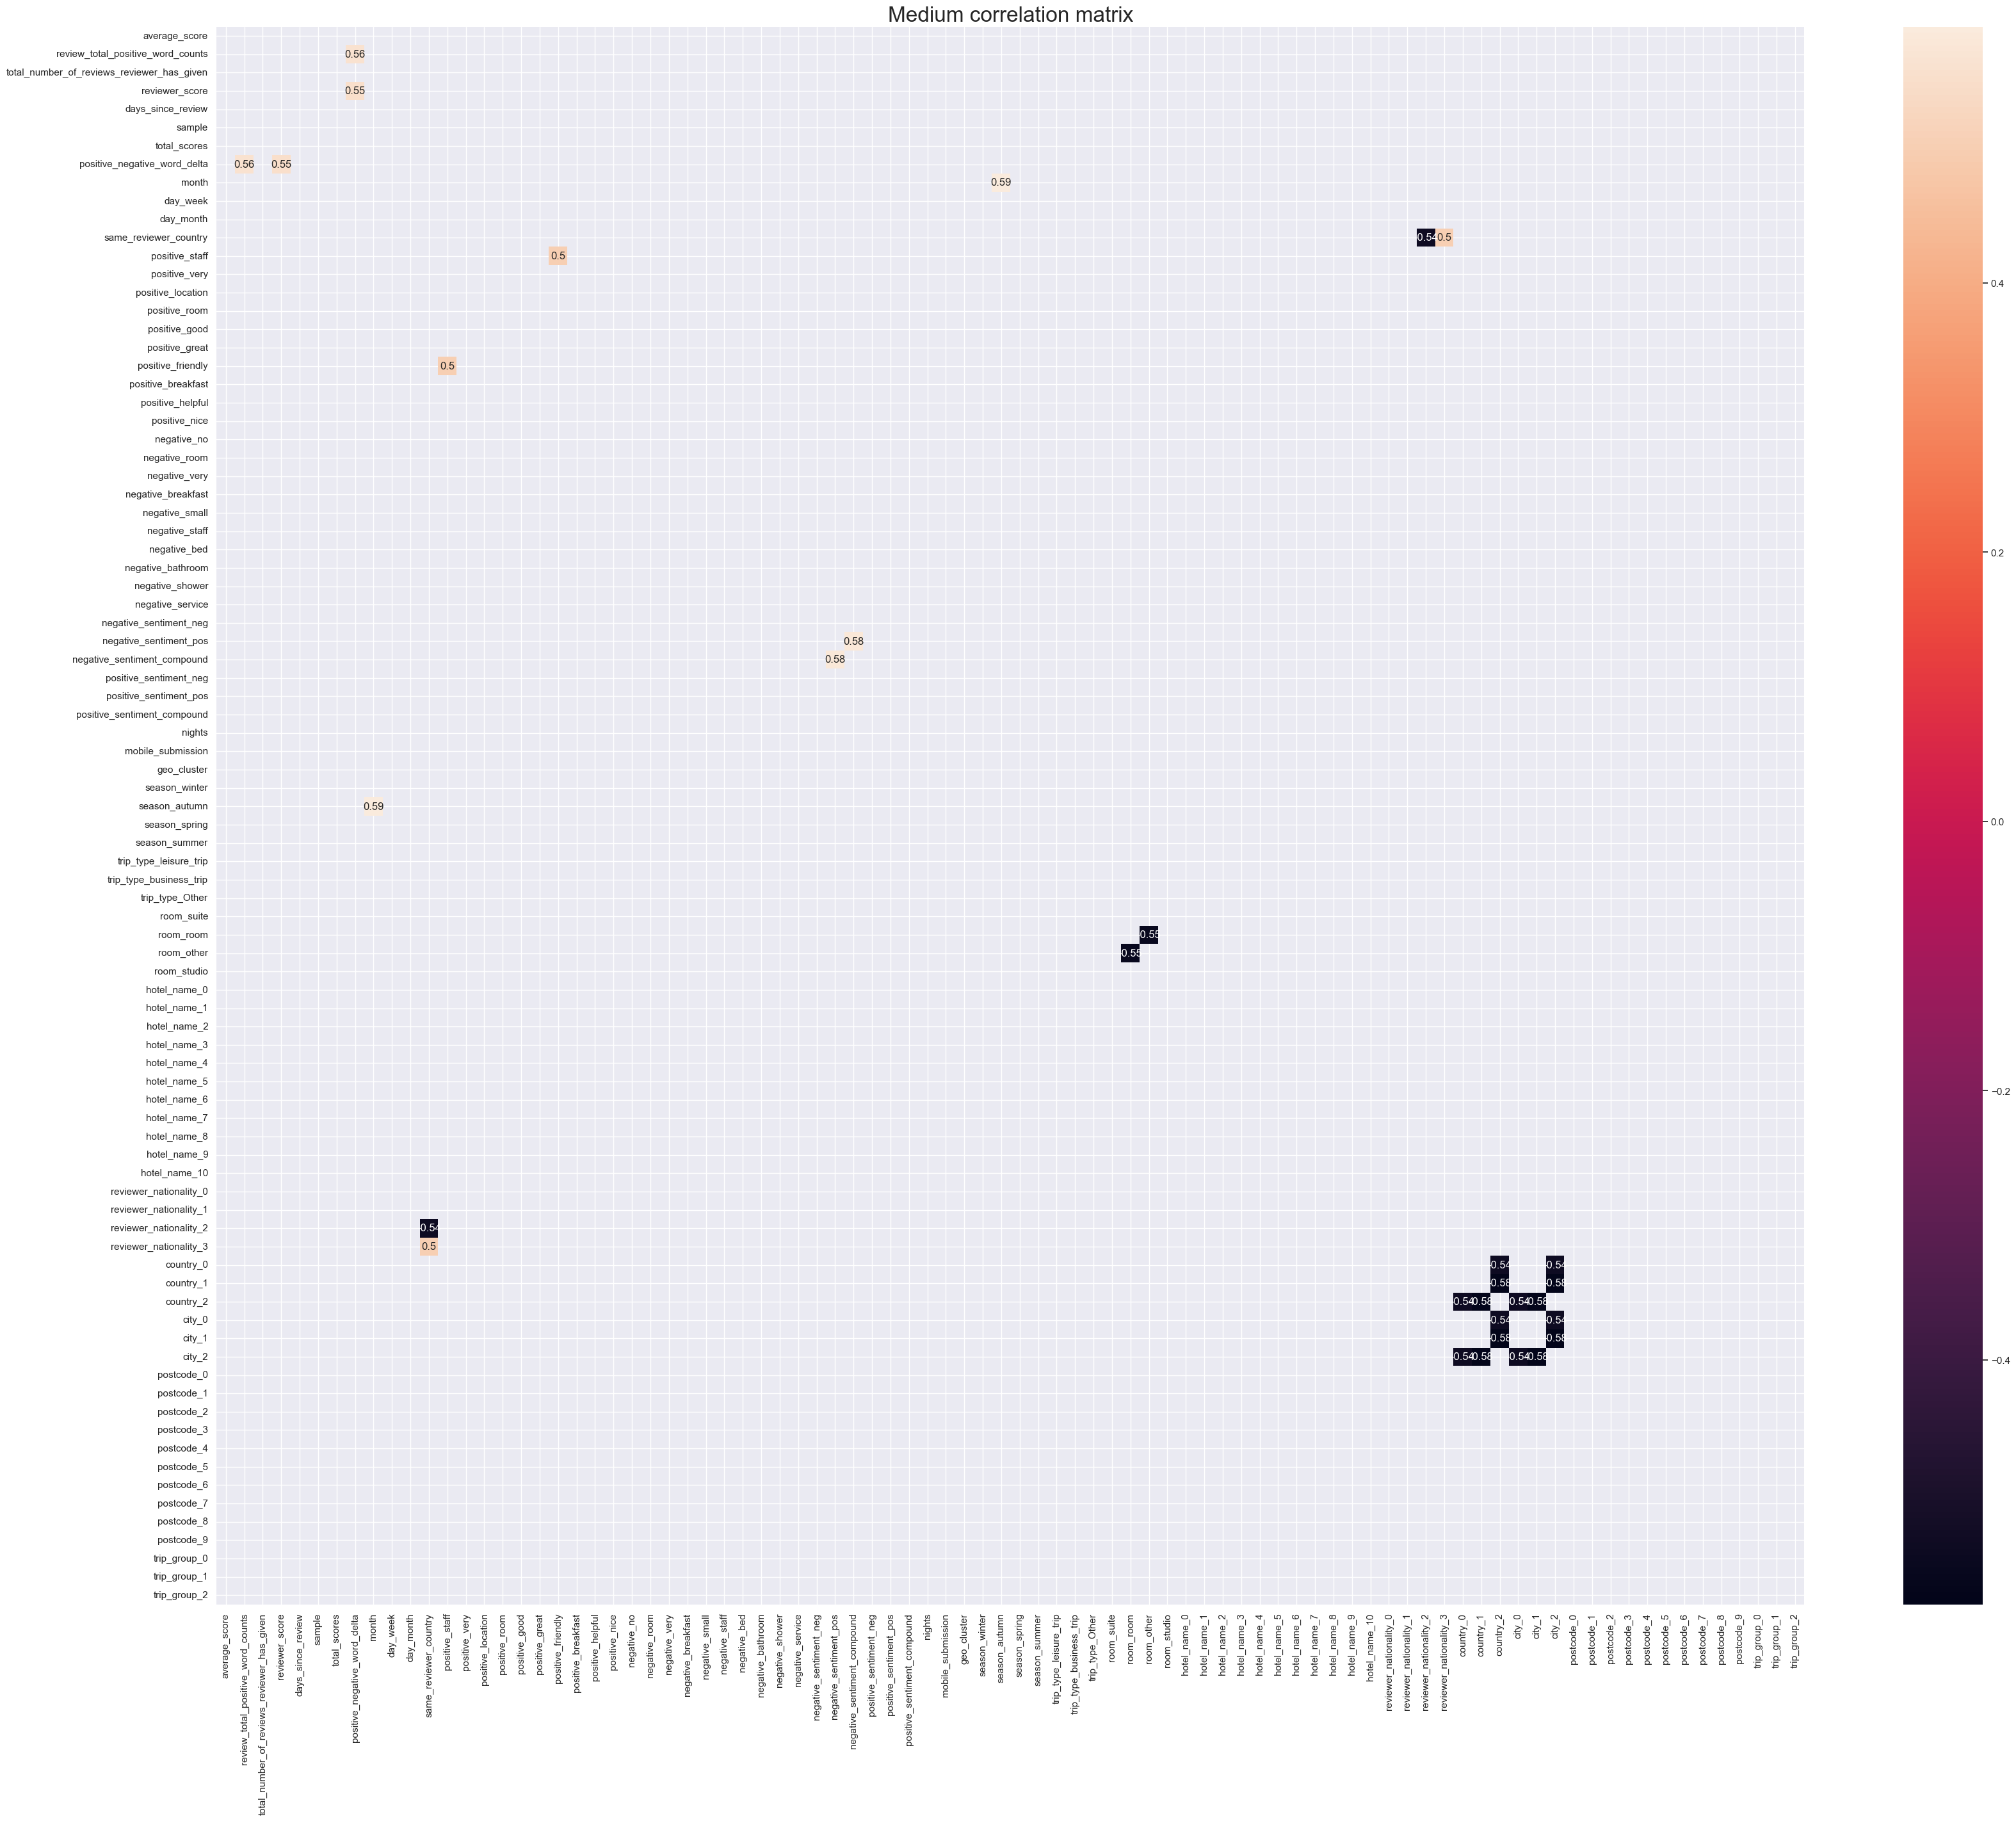

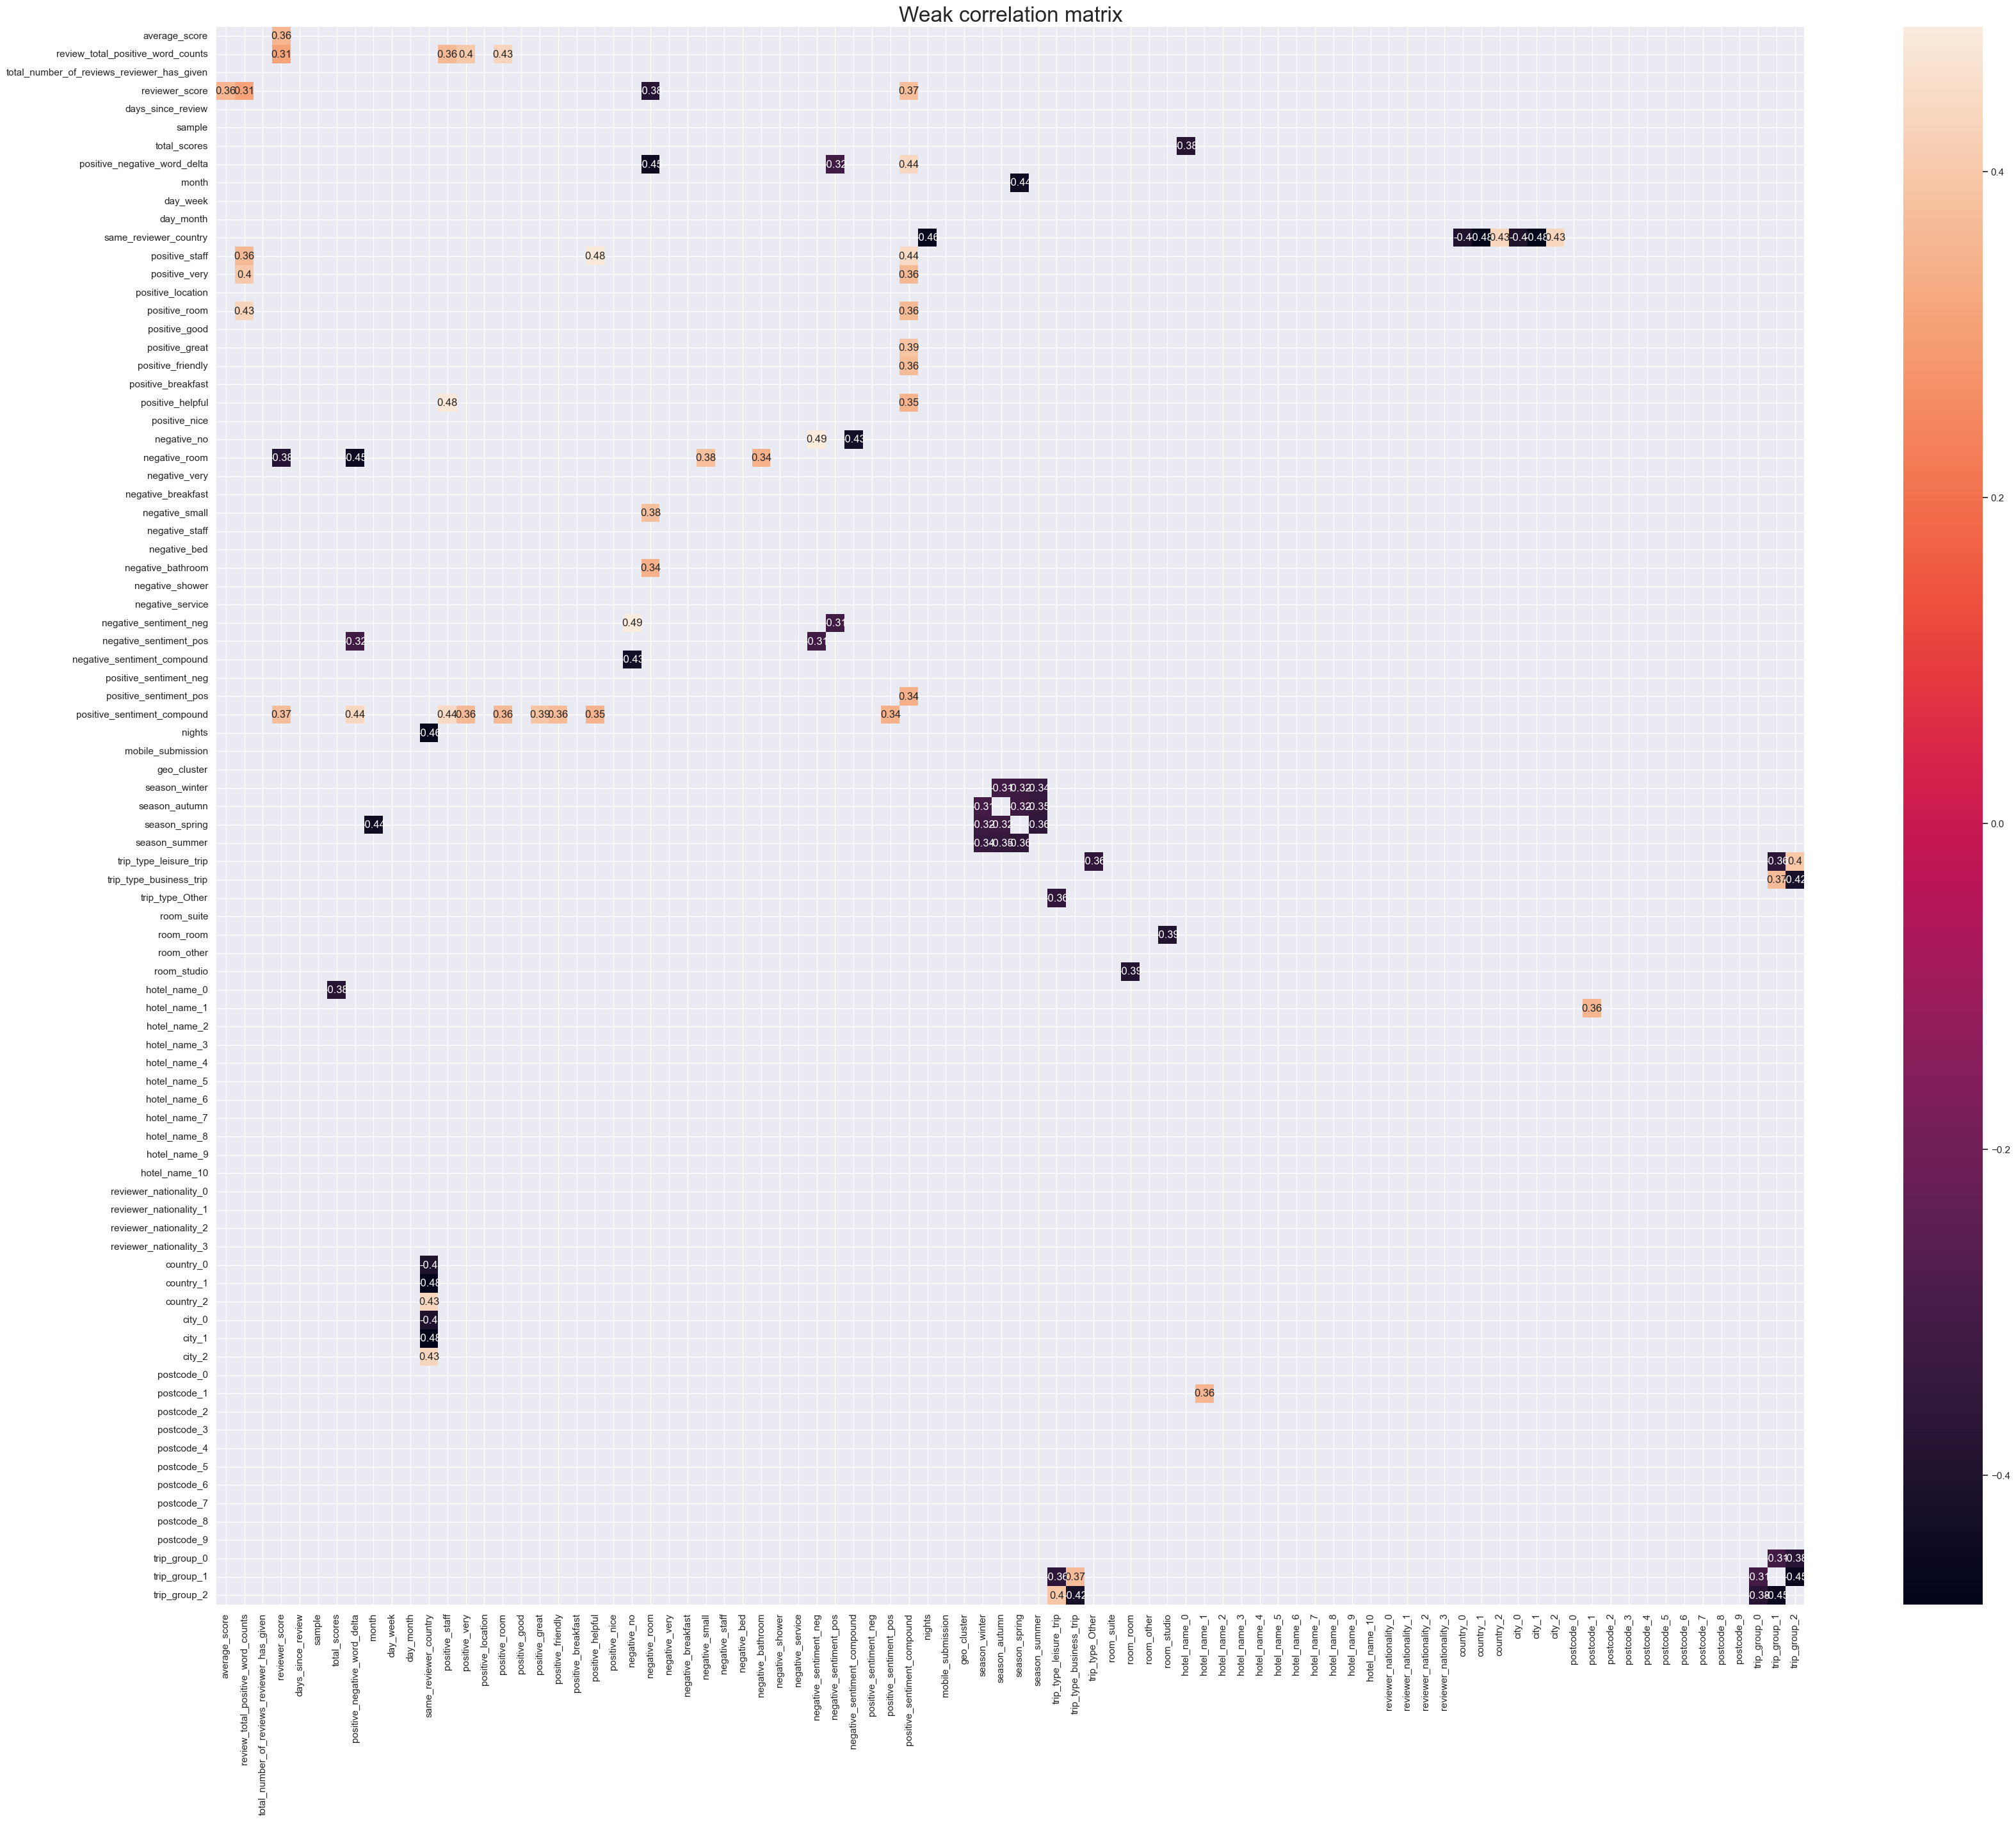

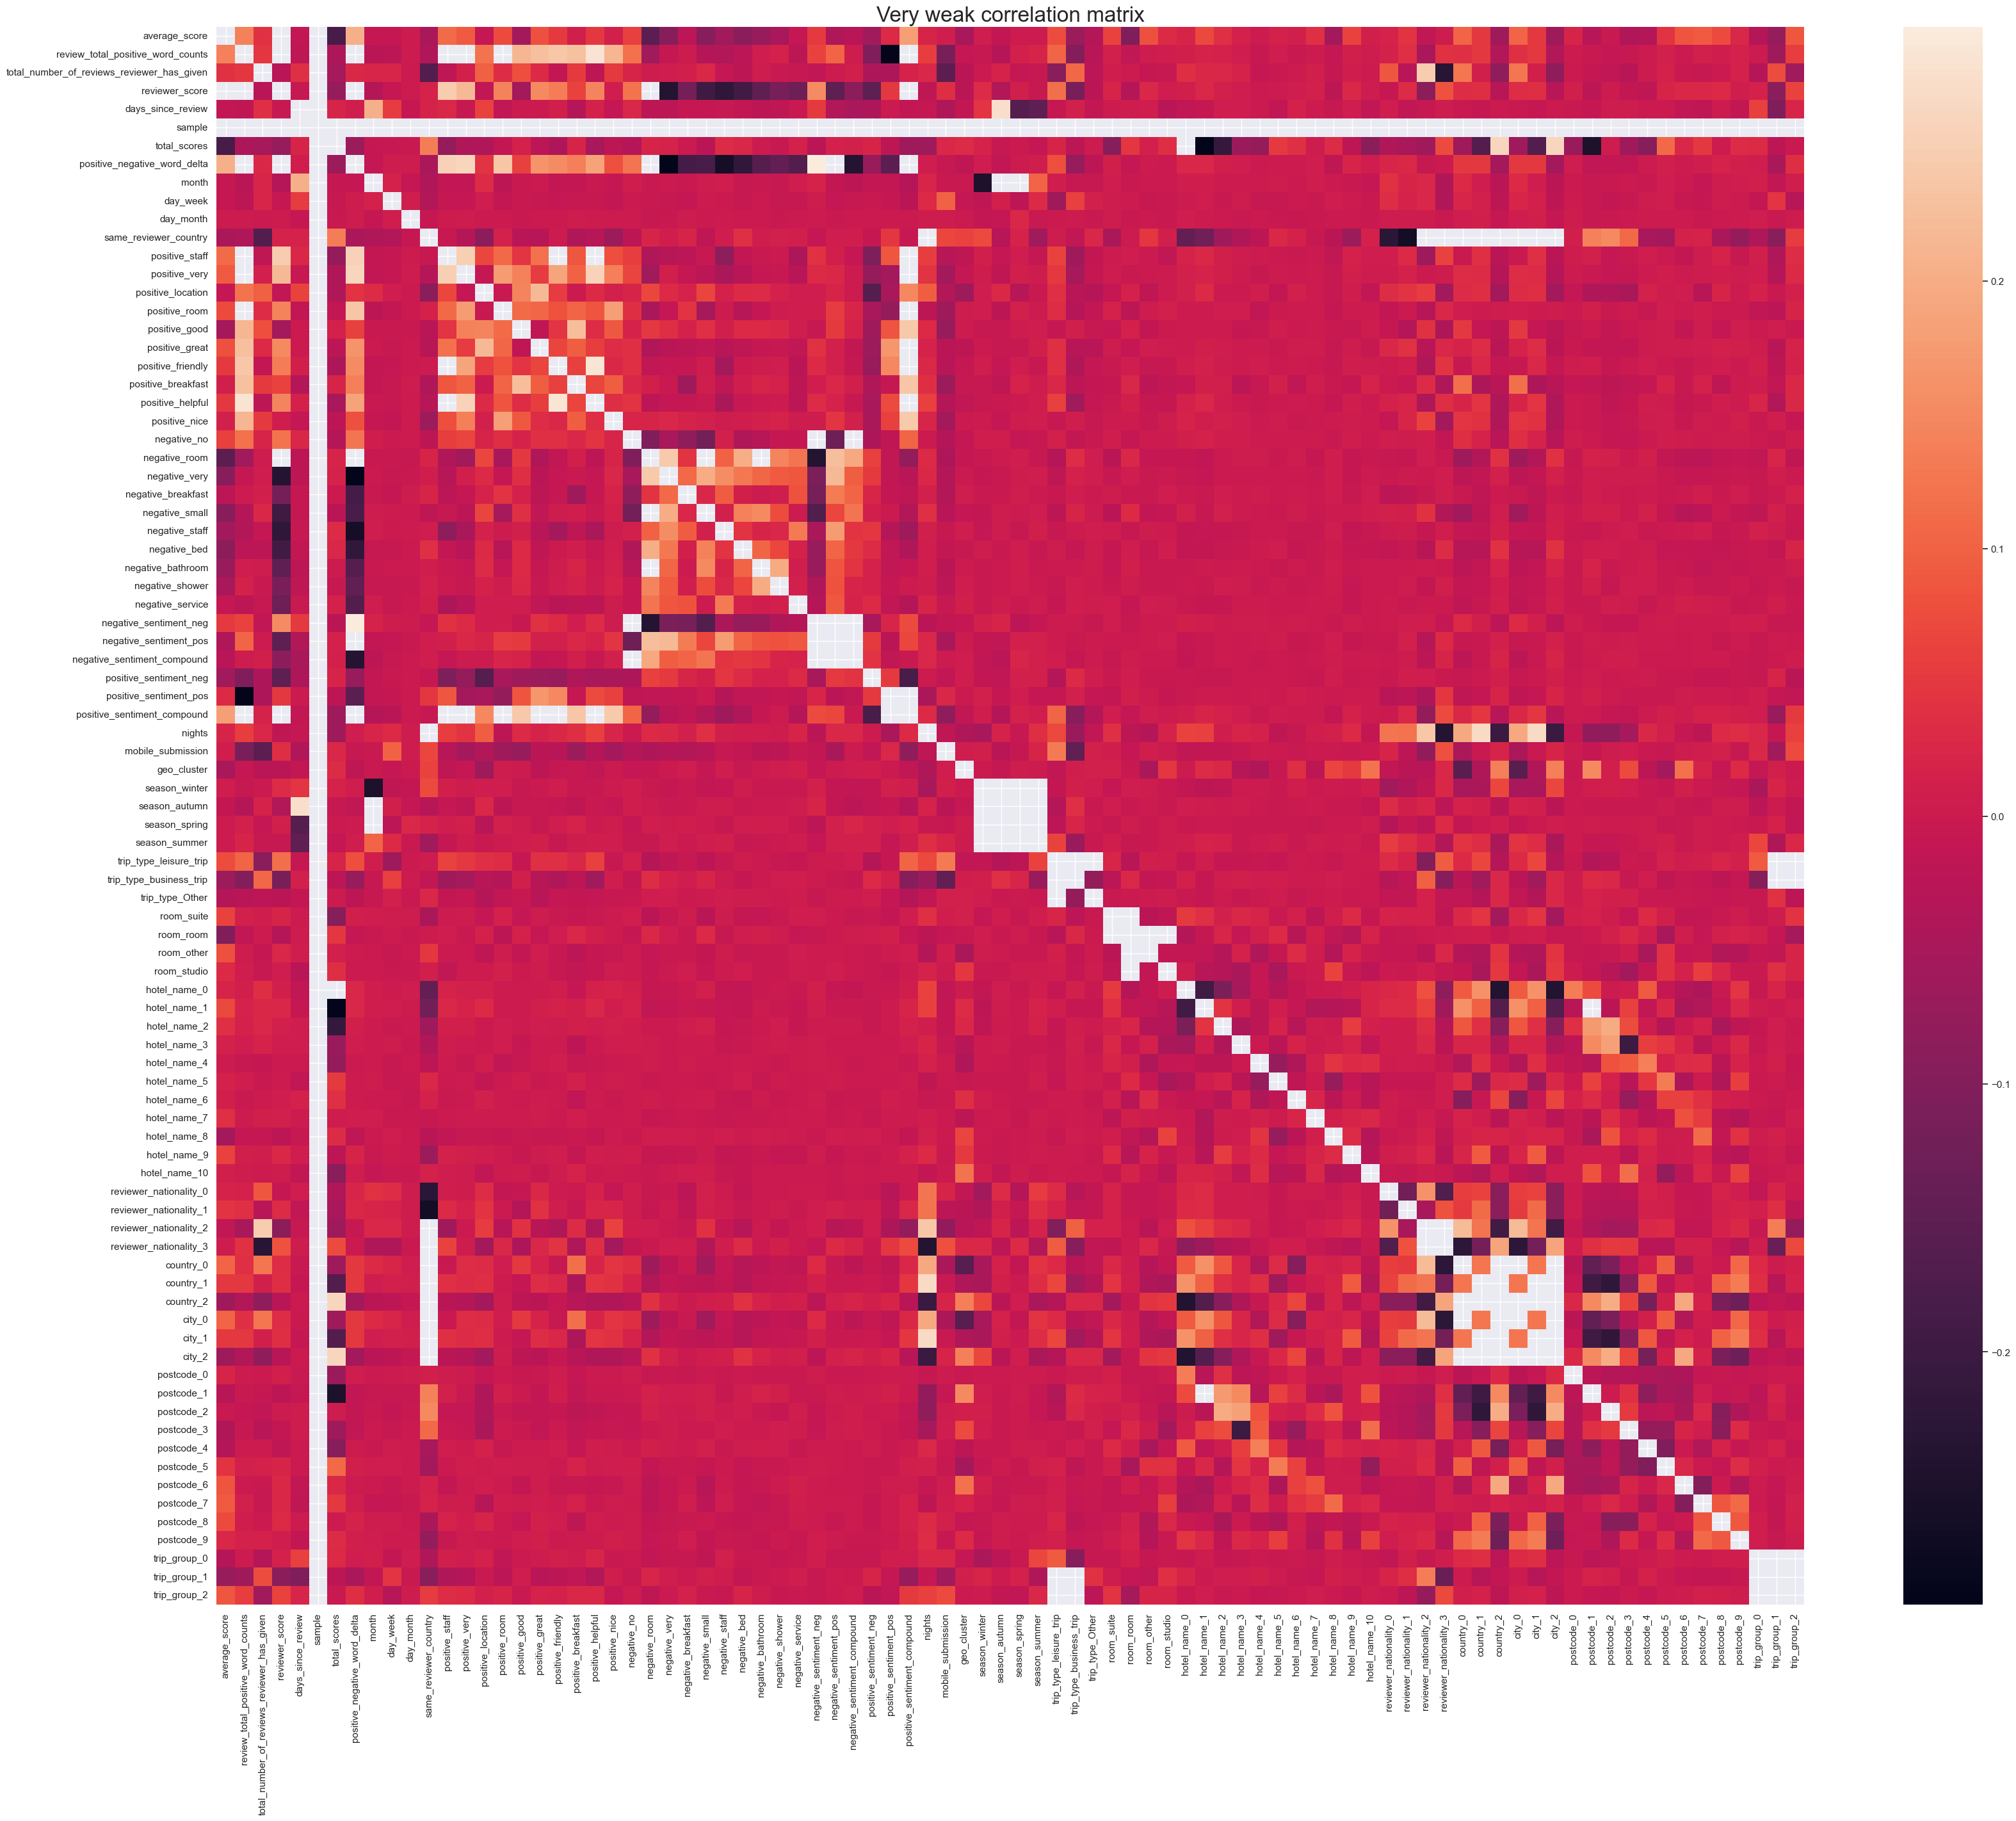

In [147]:
corr_matrix = df[df['sample']==1].corr(method='spearman', numeric_only=True)
draw_corr_matrix(corr_matrix, 0.9, 1.01, 'Extreme', annot=True)
draw_corr_matrix(corr_matrix, 0.7, 0.9, 'Strong', annot=True)
draw_corr_matrix(corr_matrix, 0.5, 0.7, 'Medium', annot=True)
draw_corr_matrix(corr_matrix, 0.3, 0.5, 'Weak', annot=True)
draw_corr_matrix(corr_matrix, 0.0, 0.3, 'Very weak', annot=False)

Need to do the following transformations:
- replace the trip features with a boolean feature of whether the trip is leisure
- drop ```country``` due to the 1-to-1 matches with ```city```
- drop ```review_total_positive_word_counts``` due to a high correlation with ```positive_sentiment_compound```

In [148]:
df['is_leisure'] = df['trip_type_leisure_trip'].apply(lambda x: 1 if x==1 else 0)

In [149]:
df.drop(['country_0', 'country_1', 'country_2', 'review_total_positive_word_counts', 'trip_type_leisure_trip', 'trip_type_business_trip', 'trip_type_Other'], axis=1, inplace=True)

***
### Feature selection

Top-20 features:


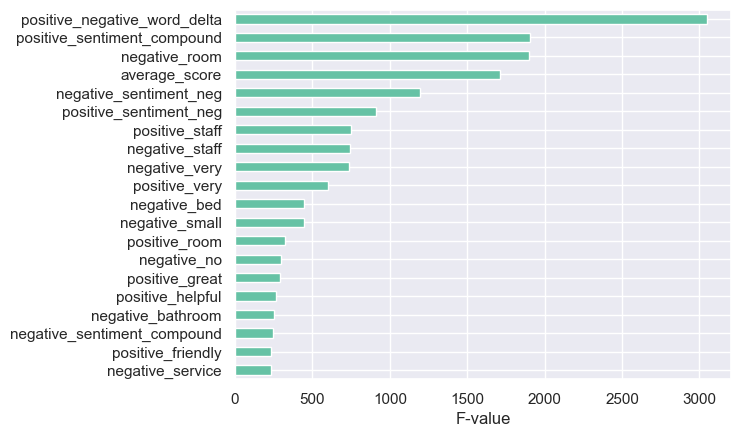

Bottom 20 features:


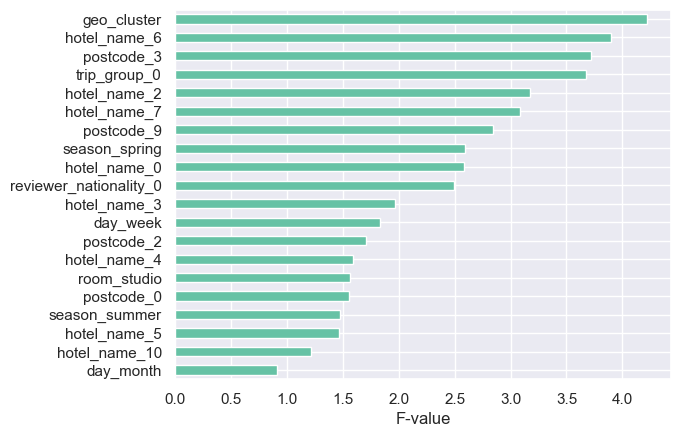

In [150]:
# creating the df for training
df_train = df[df['sample']==1]

X = df_train.drop(['reviewer_score', 'sample'], axis=1)
y = df_train['reviewer_score']

# displaying top and bottom 20 features
imp_num = pd.Series(f_classif(X, y)[0], index=X.columns)
imp_num.sort_values(inplace=True)
print("Top-20 features:")
imp_num[-20:].plot(kind='barh');
plt.xlabel('F-value')
plt.show()

print("Bottom 20 features:")
imp_num[:20].plot(kind='barh');
plt.xlabel('F-value')
plt.show()

In [151]:
# dropping all features with the F-test score below 5
cols_to_drop = imp_num[imp_num < 5].index.tolist()
X.drop(cols_to_drop, axis=1, inplace=True)

## 4. Model creation and evaluation

In [152]:
# 75% for train and 25% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [153]:
# creating and training the model
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)

# predicting test review scores
y_pred = regr.predict(X_test)

In [154]:
# evaluating the model using Mean Absolute Percentage Error (MAPE)
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12057719537934272


In [155]:
# predicting on the test dataset
df_test = df[df['sample']==0]
df_test = df_test[X_train.columns]
test_pred = regr.predict(df_test)

In [156]:
submission = pd.read_csv('data/inputs/submission.csv')
submission['reviewer_score'] = test_pred
submission.to_csv('data/outputs/test_predictions.csv', index=False)